# Germany - EDA

### This NoteBook deals with exploratory data analysis for the country Germany. The data contains various features regarding the COVID -19 outbreak.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy  as np 
import datetime as dt
pd.set_option('mode.chained_assignment',None)

In [ ]:
df_data_1  = pd.read_csv("/content/drive/My Drive/Colab Notebooks/owid-covid-data.csv")

### The above dataframe contains the data with relevent infromation of the covid cases and other features of each country over the period on covid-19 outbreak.


# Obtaning the data for the country Germany

In [ ]:
grouped = df_data_1.groupby(df_data_1.location)
df_germany  = grouped.get_group("Germany")

print("The shape of the data frame is ", (df_germany.shape))
print("The columns of the data frame are",df_germany.columns)
df_germany.tail(10)

The shape of the data frame is  (290, 41)
The columns of the data frame are Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_developme

iso_code continent  ... life_expectancy human_development_index
12030      DEU    Europe  ...           81.33                   0.936
12031      DEU    Europe  ...           81.33                   0.936
12032      DEU    Europe  ...           81.33                   0.936
12033      DEU    Europe  ...           81.33                   0.936
12034      DEU    Europe  ...           81.33                   0.936
12035      DEU    Europe  ...           81.33                   0.936
12036      DEU    Europe  ...           81.33                   0.936
12037      DEU    Europe  ...           81.33                   0.936
12038      DEU    Europe  ...           81.33                   0.936
12039      DEU    Europe  ...           81.33                   0.936

[10 rows x 41 columns]

In [ ]:
features_with_na=[features for features in df_germany.columns if df_germany[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df_germany[feature].isnull().mean(), 4),  ' % missing values')

new_cases_smoothed 0.0207  % missing values
new_deaths_smoothed 0.0207  % missing values
new_cases_smoothed_per_million 0.0207  % missing values
new_deaths_smoothed_per_million 0.0207  % missing values
new_tests 1.0  % missing values
total_tests 0.8931  % missing values
total_tests_per_thousand 0.8931  % missing values
new_tests_per_thousand 1.0  % missing values
new_tests_smoothed 0.2966  % missing values
new_tests_smoothed_per_thousand 0.2966  % missing values
tests_per_case 0.2966  % missing values
positive_rate 0.2966  % missing values
tests_units 0.2724  % missing values
stringency_index 0.0379  % missing values
extreme_poverty 1.0  % missing values
handwashing_facilities 1.0  % missing values


In [ ]:
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 11750 to 12039
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         290 non-null    object 
 1   continent                        290 non-null    object 
 2   location                         290 non-null    object 
 3   date                             290 non-null    object 
 4   total_cases                      290 non-null    float64
 5   new_cases                        290 non-null    float64
 6   new_cases_smoothed               284 non-null    float64
 7   total_deaths                     290 non-null    float64
 8   new_deaths                       290 non-null    float64
 9   new_deaths_smoothed              284 non-null    float64
 10  total_cases_per_million          290 non-null    float64
 11  new_cases_per_million            290 non-null    float64
 12  new_cases_smooth

In [ ]:
df_germany['tests_units'].unique()

array([nan, 'tests performed'], dtype=object)

Droping the rows which don't contain any total cases for that day. ( not even a single cases were there)

In [ ]:
df_germany = df_germany[df_germany['total_cases'] !=0] 
df_germany.shape

(262, 41)

## From the analysis we can see that columns   extreme_poverty, handwashing_facilities, new_tests_per_thousand, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand  have more that 89% of the missing values and the column tests_units dont  contain any useful information.


In [ ]:
df_germany.drop(columns=['new_tests', 'total_tests','total_tests_per_thousand', 'new_tests_per_thousand','extreme_poverty','handwashing_facilities','tests_units'], axis =1 ,inplace =True)

### COVID-19: Stringency Index, This is a composite measure based on nine response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest). If policies vary at the subnational level, the index is shown as the response level of the strictest sub-region.

https://ourworldindata.org/grapher/covid-stringency-index

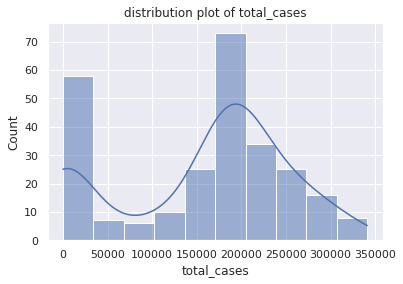

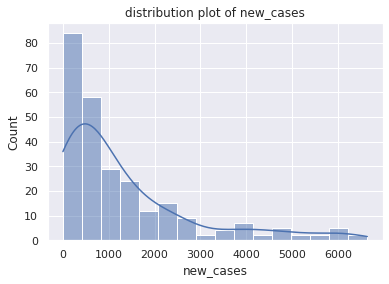

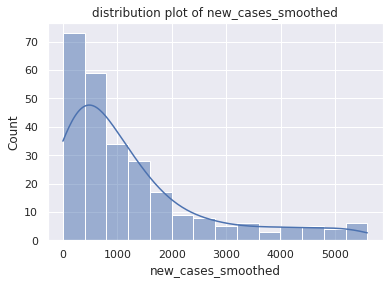

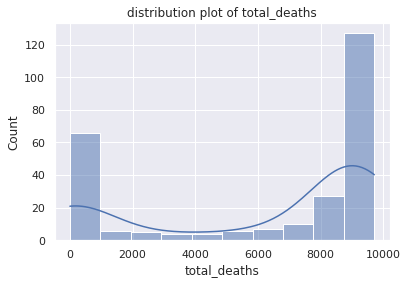

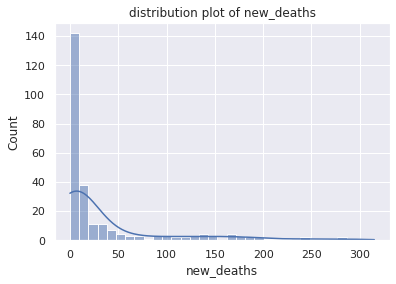

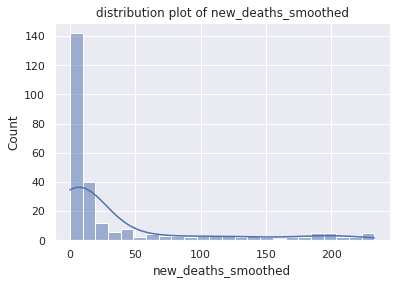

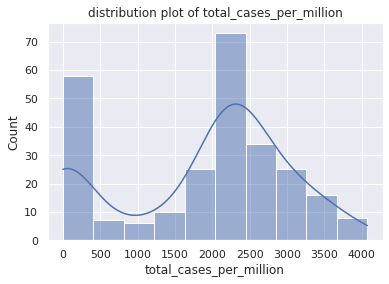

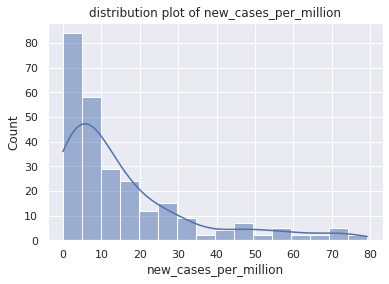

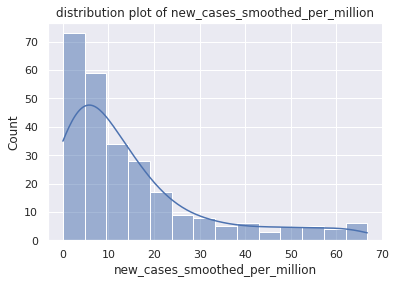

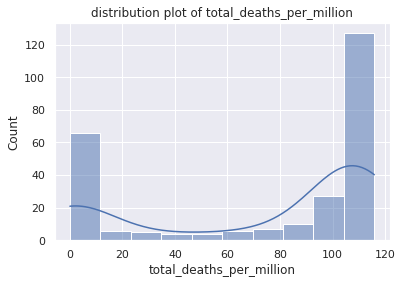

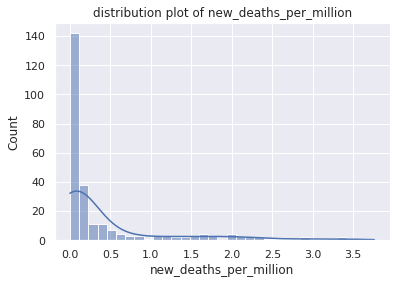

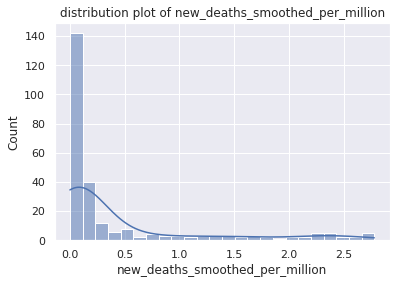

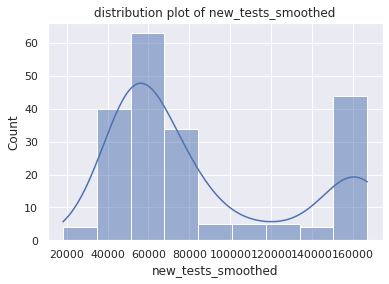

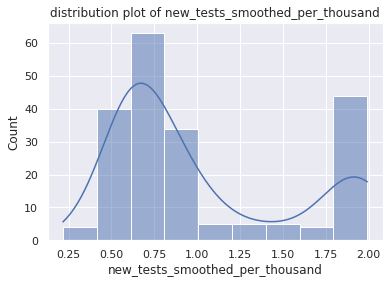

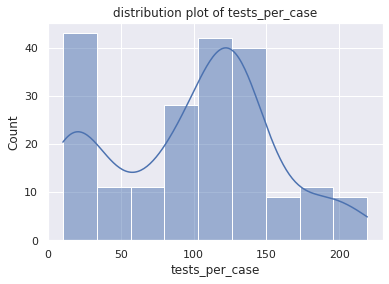

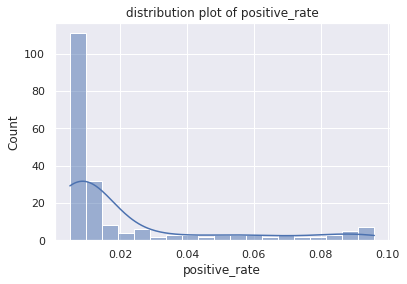

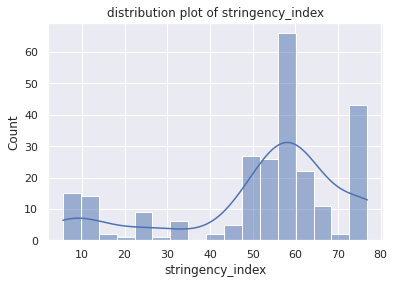

In [ ]:
df_data  = df_germany.loc[:,'total_cases':'stringency_index']
df_data = df_data.select_dtypes([np.int, np.float])
for i, col in enumerate(df_data.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df_data,kde=True).set_title("distribution plot of "+col)

# The above plot also give the distribution of the variables , we can sesome are right skewed and we can see that most the distrubution dont follow normal distribution.

###  we have replaced the missing values by median for positive rate , stringency index and mean for other variables which have missing values.


In [ ]:
df_germany['new_tests_smoothed']=df_germany['new_tests_smoothed'].fillna(df_germany['new_tests_smoothed'].mean())
df_germany['new_tests_smoothed_per_thousand']=df_germany['new_tests_smoothed_per_thousand'].fillna(df_germany['new_tests_smoothed_per_thousand'].mean())
df_germany['tests_per_case']=df_germany['tests_per_case'].fillna(df_germany['tests_per_case'].mean())
df_germany['positive_rate']=df_germany['positive_rate'].fillna(df_germany['positive_rate'].median())
df_germany['new_cases_smoothed']=df_germany['new_cases_smoothed'].fillna(df_germany['new_cases_smoothed'].mean())
df_germany['new_deaths_smoothed_per_million']=df_germany['new_deaths_smoothed_per_million'].fillna(df_germany['new_deaths_smoothed_per_million'].mean())
df_germany['new_deaths_smoothed']=df_germany['new_deaths_smoothed'].fillna(df_germany['new_deaths_smoothed'].mean())
df_germany['new_cases_smoothed_per_million']=df_germany['new_cases_smoothed_per_million'].fillna(df_germany['new_cases_smoothed_per_million'].mean())
df_germany['stringency_index'] = df_germany['stringency_index'].fillna(df_germany['stringency_index'].median())

In [ ]:
df_germany.isnull().sum().sum()

0

In [ ]:
(df_germany.population.unique()/1000)*df_germany.hospital_beds_per_thousand.unique()

array([670271.56])

Adding a new feature named recovered cases  and converting the date from object to datetime  and adding another feature named month 

In [ ]:
df_germany['recovered_cases'] = df_germany['total_cases']-df_germany['total_deaths'] - df_germany['new_cases']
df_germany['date'] = pd.to_datetime(df_germany['date'],format='%Y-%m-%d') 
df_germany['month'] = df_germany['date'].dt.month_name()

Text(0.5, 1.0, 'distribution plot of recoveres cases')

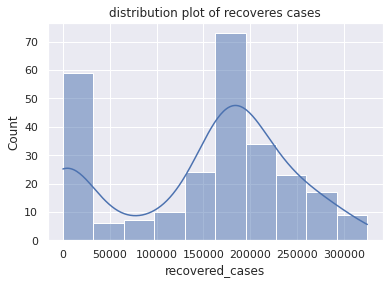

In [ ]:
sns.histplot(x=df_germany.recovered_cases, kde=True).set_title("distribution plot of recoveres cases")

In [ ]:
df = df_germany.describe()
df

total_cases    new_cases  ...  human_development_index  recovered_cases
count     262.000000   262.000000  ...             2.620000e+02       262.000000
mean   156543.744275  1302.377863  ...             9.360000e-01    149128.297710
std     97102.863830  1481.317723  ...             5.228035e-15     93161.500358
min         1.000000     0.000000  ...             9.360000e-01         0.000000
25%     75065.500000   334.750000  ...             9.360000e-01     67996.750000
50%    183828.500000   757.000000  ...             9.360000e-01    174817.500000
75%    217751.250000  1729.500000  ...             9.360000e-01    207662.750000
max    341223.000000  6638.000000  ...             9.360000e-01    324875.000000

[8 rows x 31 columns]



### From the above describe function we can see that these columns have constant values over the data frame
1.cardiovasc_death_rate (156.139)

2.diabetes_prevalence (8.31)

3.male_smokers (33.1)

4.female_smokers(2.820000e+01)

5.hospital_beds_per_thousand (8.0)

6.life_expectancy (81.33)

7.human_development_index(0.936)

8.gdp_per_capita for germany (45229.245)

9.aged_70_older (1.595700e+01)

10.aged_70_older (1.595700e+01)

11.median_age (4.660000e+01)

12.population_density (2.370160e+02)

13.population (83783945)

### Finding the relation between few features  that are required 

total_cases  ...  tests_per_case
total_cases                         1.000000  ...        0.362036
new_cases                           0.141408  ...       -0.588377
new_cases_smoothed                  0.157346  ...       -0.650707
total_deaths                        0.950143  ...        0.532679
new_deaths                         -0.072254  ...       -0.663628
new_deaths_smoothed                -0.043918  ...       -0.665176
total_cases_per_million             1.000000  ...        0.362036
new_cases_per_million               0.141408  ...       -0.588377
new_cases_smoothed_per_million      0.157346  ...       -0.650707
total_deaths_per_million            0.950142  ...        0.532680
new_deaths_per_million             -0.072248  ...       -0.663608
new_deaths_smoothed_per_million    -0.043920  ...       -0.665171
stringency_index                    0.501407  ...       -0.271533
recovered_cases                     0.999945  ...        0.364219
positive_rate                      -0.289924  ...       -0.783079
new_tests_smoothed                  0.458445  ...        0.306948
new_tests_smoothed_per_thousand     0.458447  ...        0.306962
tests_per_case                      0.362036  ...        1.000000

[18 rows x 18 columns]

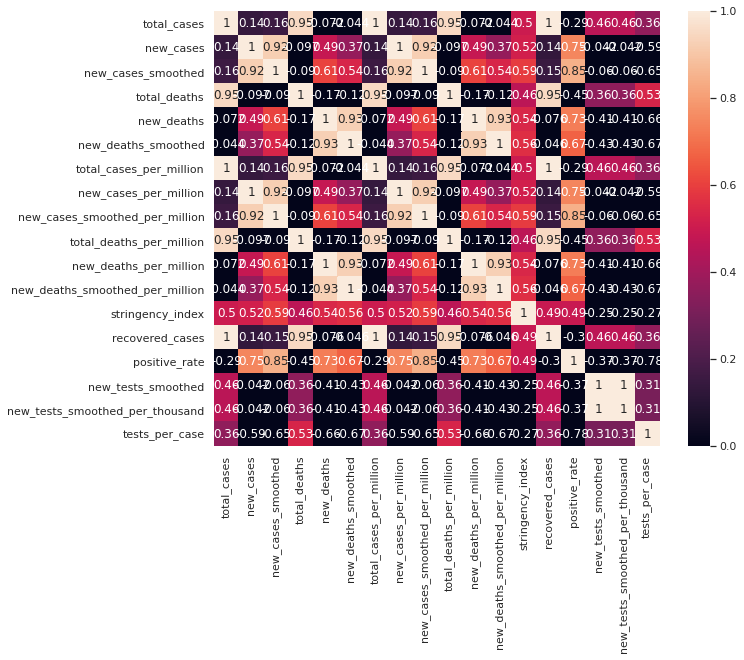

In [ ]:
df_corr = df_germany[['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million','stringency_index','recovered_cases','positive_rate','new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case']].corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_corr, vmin=0, vmax=1,annot=True)
df_corr

### From the head map we can see that so many features are very highly corelated to each other  and have correlation equal to 1 . Since the variable/features total tests per million new cases per million and new cases smothened and total cases somothend are  those dirived from  total cases and new cases hence the coliniarilty is high.This may lead to multicollinearity.This has to be delt further .

### To find the period of the data  from the day the covid infection started in germany 

In [ ]:
print("Starting date-",df_germany['date'].min())
print("End date-",df_germany['date'].max())
print("Length of data with respect to days :",(df_germany['date'].max() - df_germany['date'].min()))

Starting date- 2020-01-28 00:00:00
End date- 2020-10-15 00:00:00
Length of data with respect to days : 261 days 00:00:00


####  Grouping data with respect to months

In [ ]:
df_germany_new = df_germany.loc[:,'date':'stringency_index']


In [ ]:
df_germany_new1 = df_germany.loc[:,'stringency_index':]

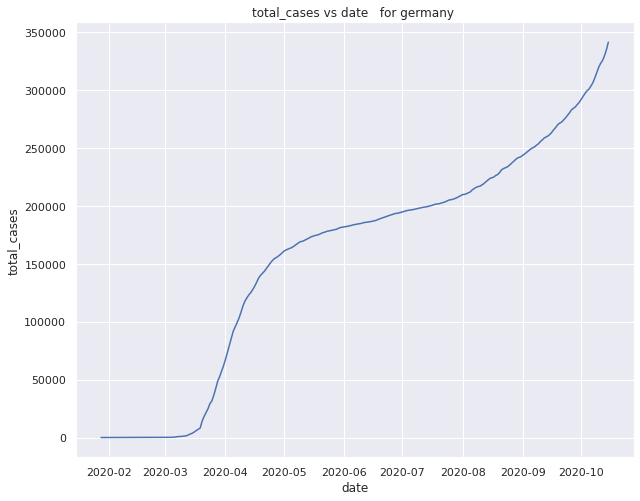

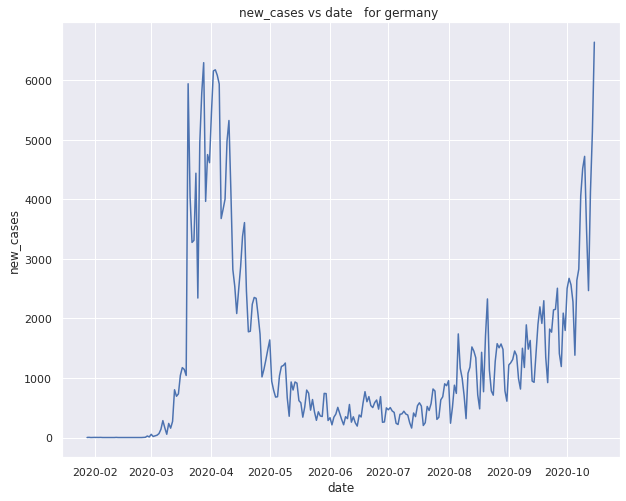

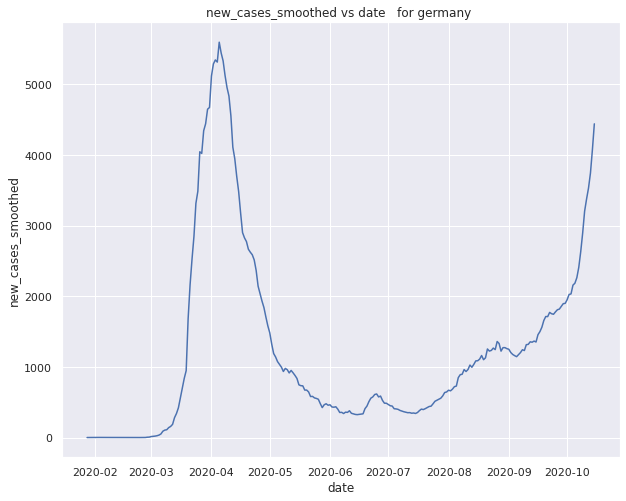

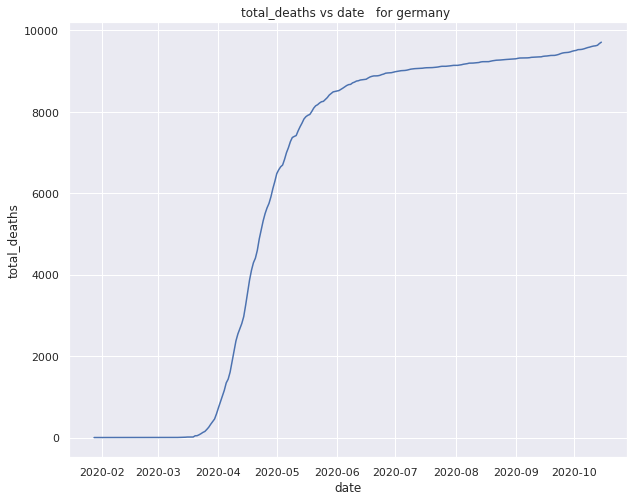

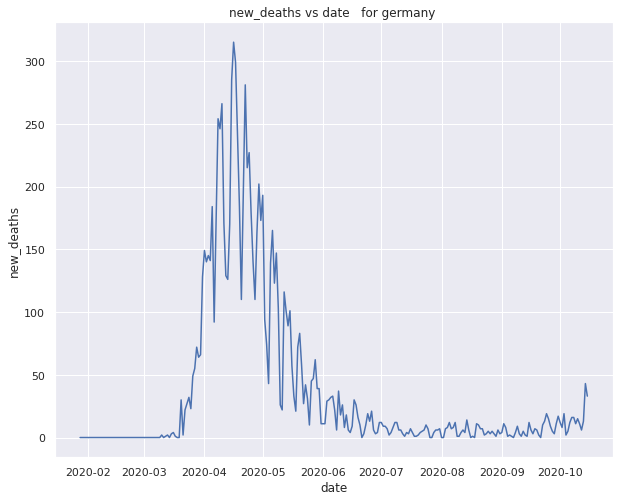

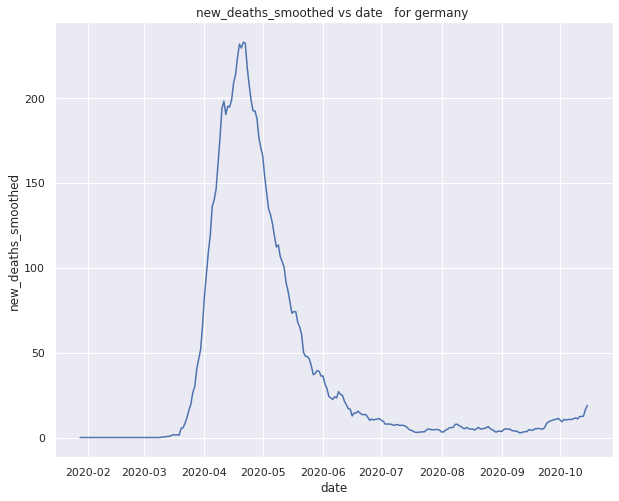

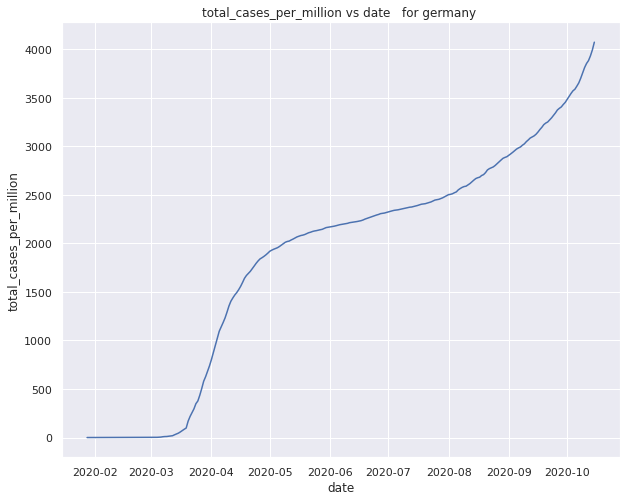

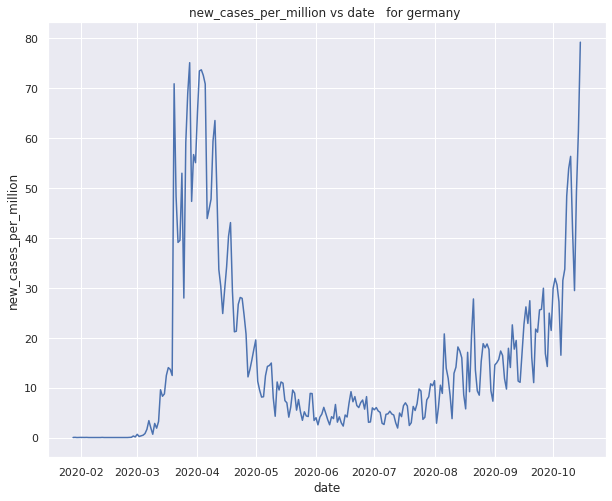

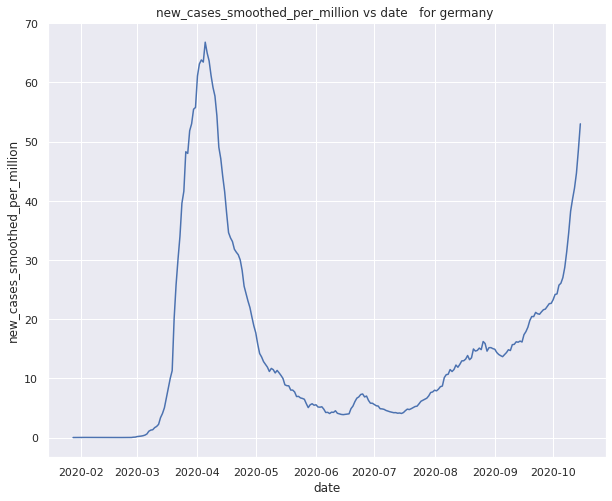

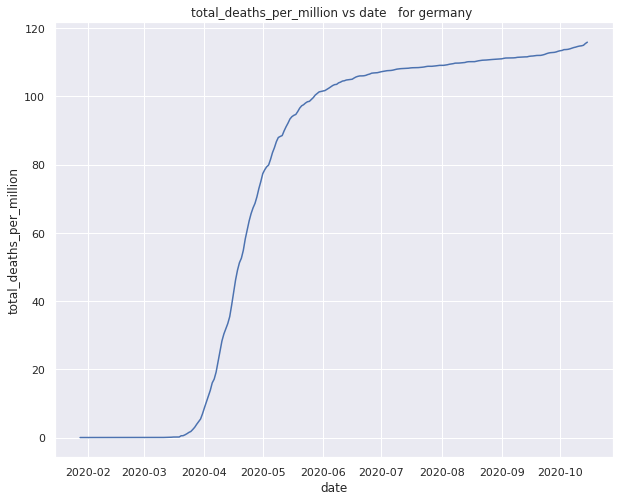

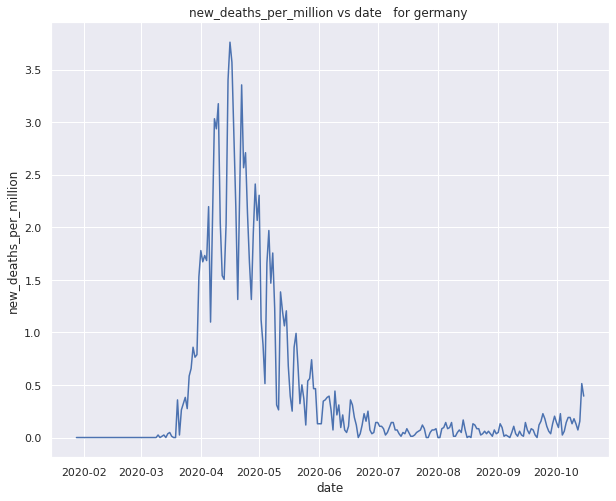

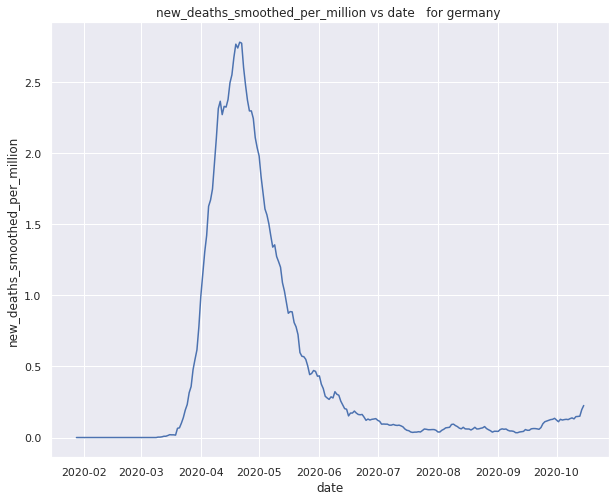

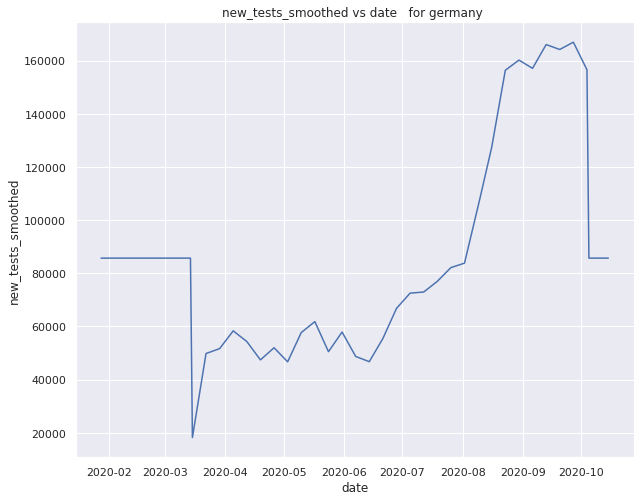

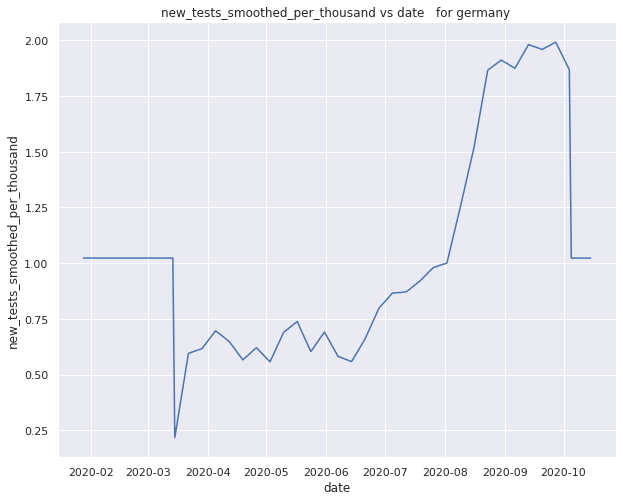

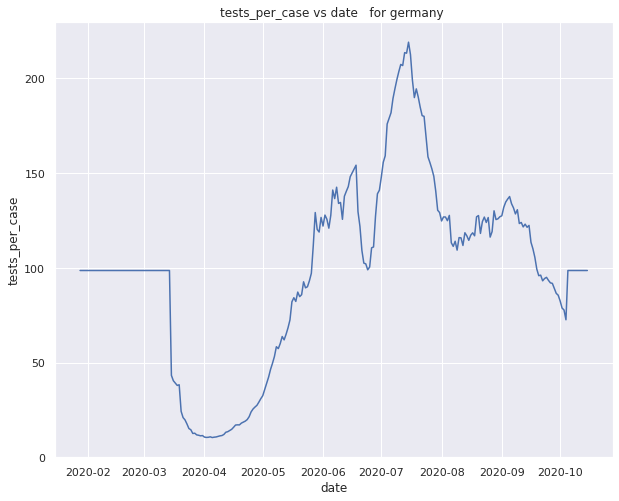

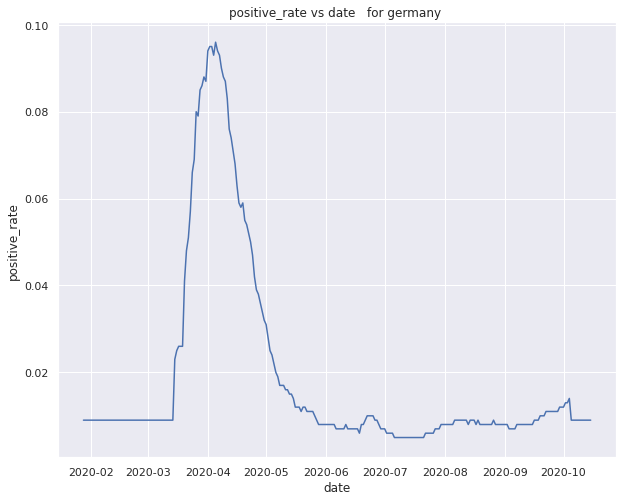

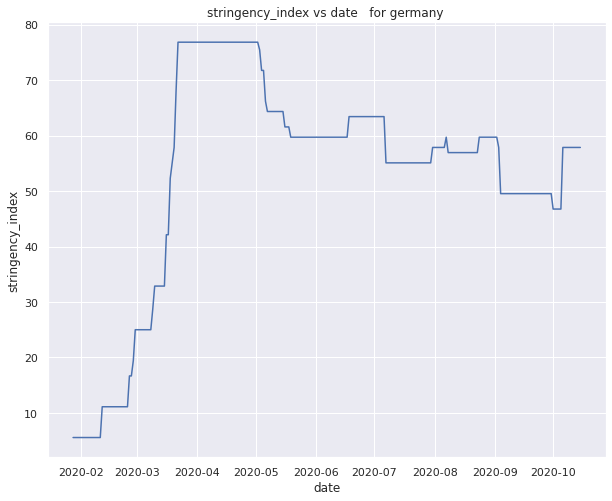

In [ ]:
for i, feature in enumerate(df_germany_new.columns[1:]):
    plt.figure(i)
    g = sns.lineplot(x=df_germany_new.date,y=feature,data=df_germany_new).set_title(feature +" vs date   for germany ")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


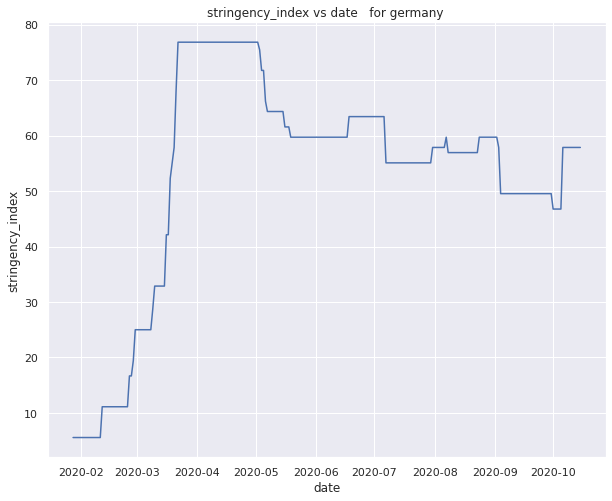

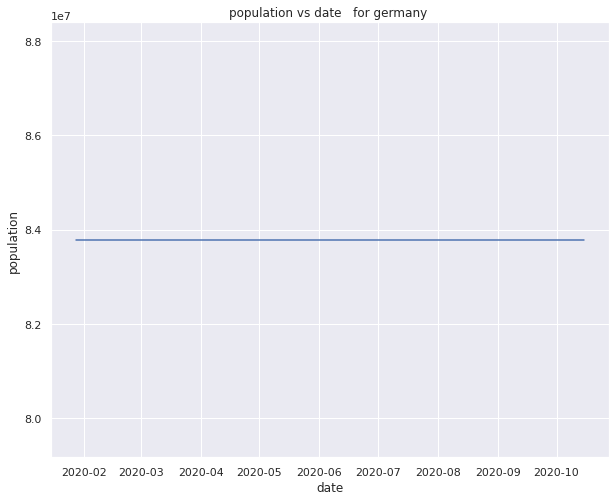

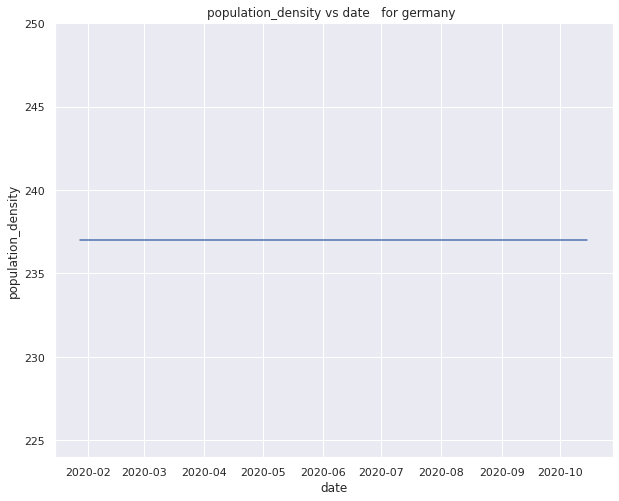

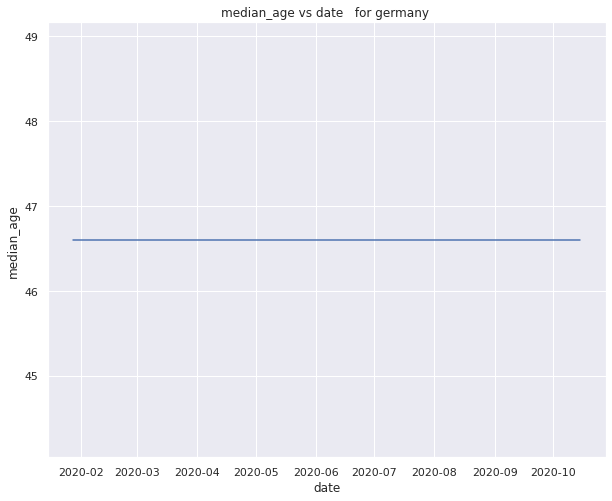

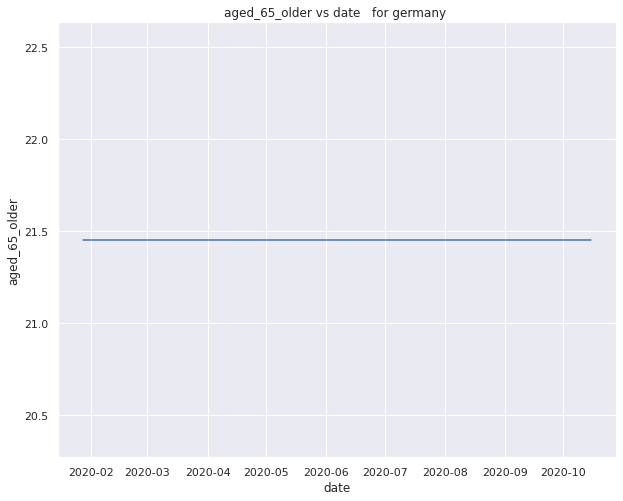

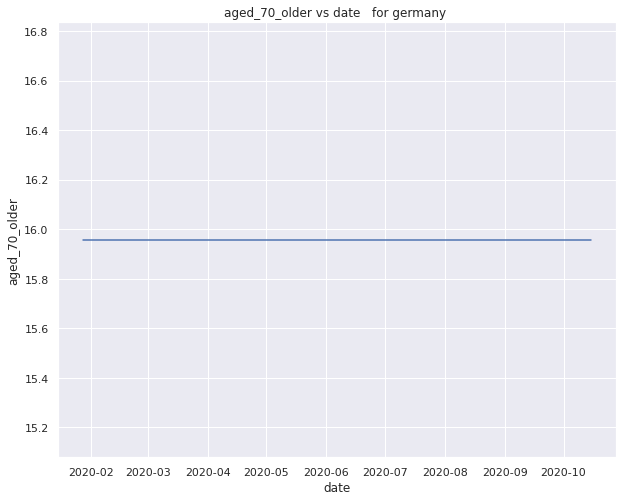

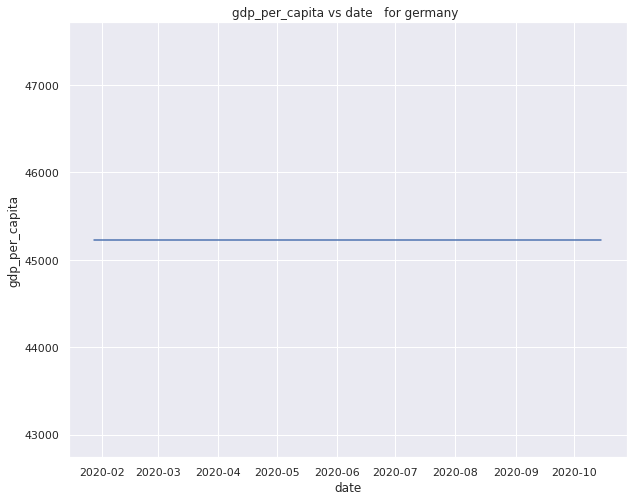

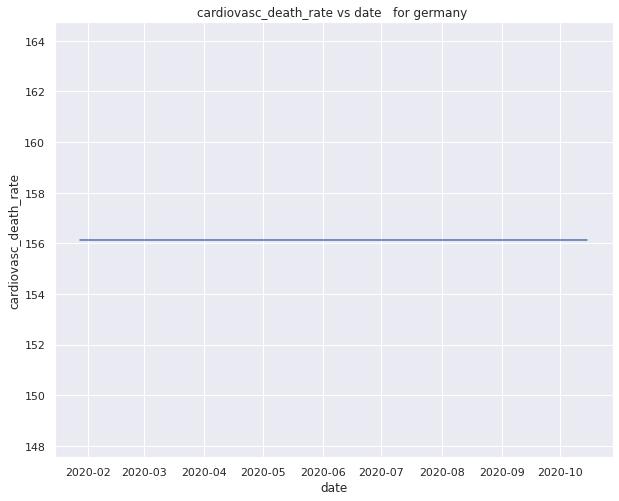

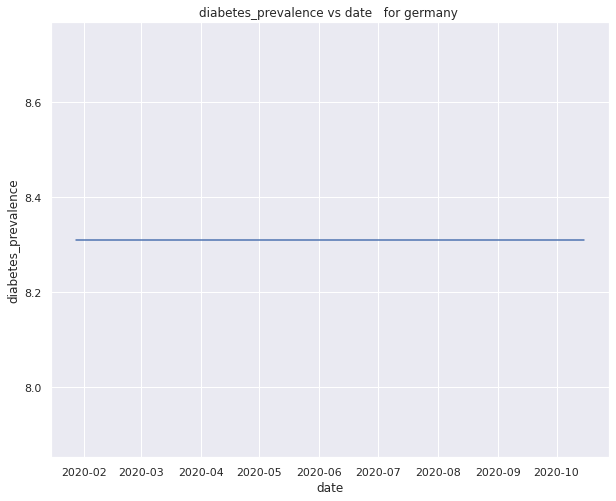

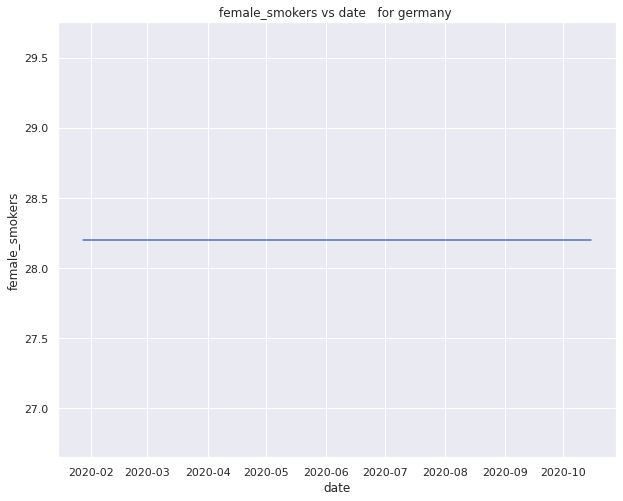

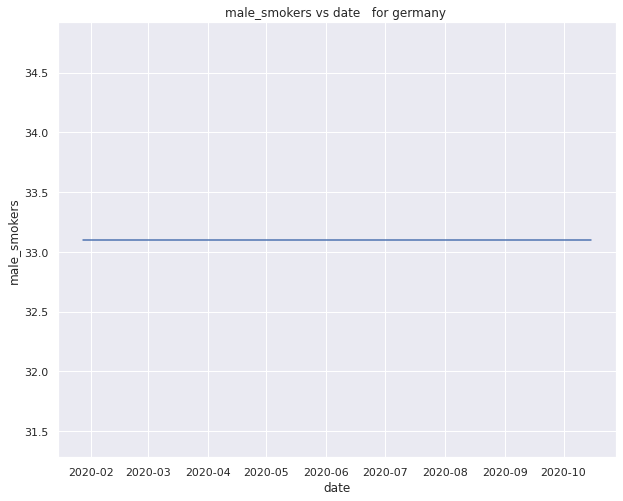

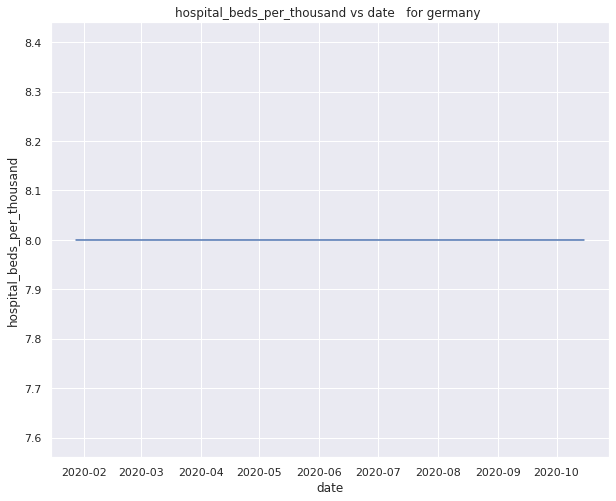

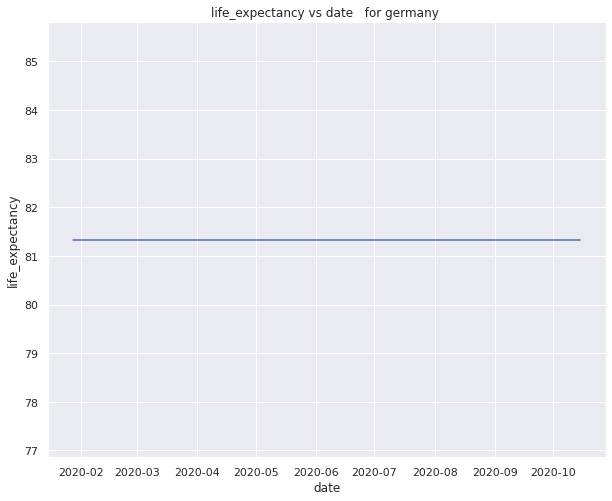

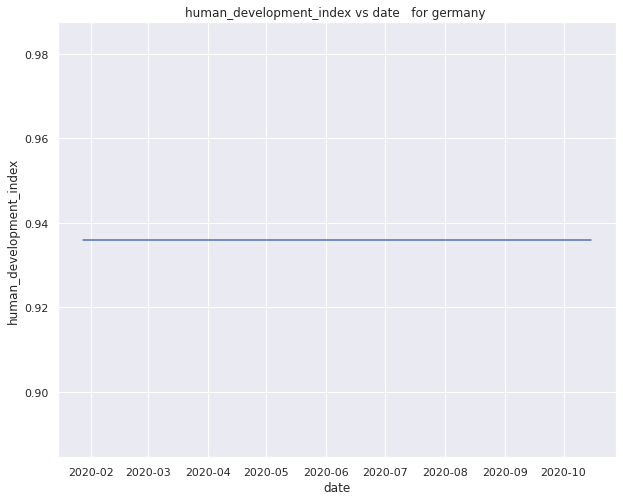

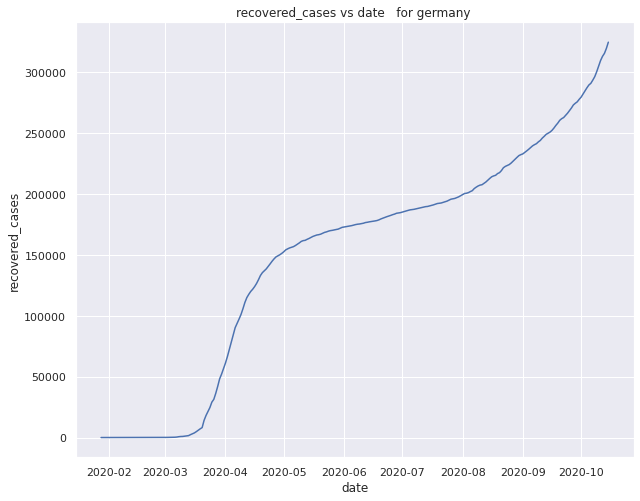

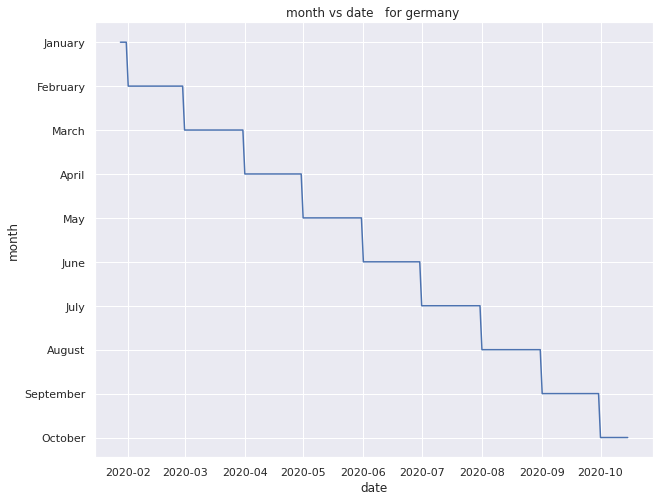

In [ ]:
for i, feature in enumerate(df_germany_new1.columns):
    plt.figure(i)
    g = sns.lineplot(x=df_germany_new.date,y=feature,data=df_germany_new1).set_title(feature +" vs date   for germany ")

# The above scatter plot gives the relation between how the each column vaires with respect to each day 

In [ ]:
df_grouped = df_germany.groupby(df_germany.month)
df_germany[df_germany['month'] == 'January']

iso_code continent  ... recovered_cases    month
11778      DEU    Europe  ...             0.0  January
11779      DEU    Europe  ...             1.0  January
11780      DEU    Europe  ...             4.0  January
11781      DEU    Europe  ...             4.0  January

[4 rows x 36 columns]

In [ ]:
df_grouped = df_germany.groupby(df_germany.month).sum()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
df_grouped = df_grouped.reindex(new_order, axis=0)
df_grouped = df_grouped.loc[:,:'stringency_index']


In [ ]:
df_grouped 

total_cases  new_cases  ...  positive_rate  stringency_index
month                              ...                                 
January           14.0        5.0  ...          0.036             22.24
February         473.0       52.0  ...          0.261            294.48
March         481584.0    61856.0  ...          1.089           1512.01
April        3737253.0    97206.0  ...          2.015           2305.50
May          5348754.0    22363.0  ...          0.462           1979.10
June         5624689.0    12777.0  ...          0.236           1839.83
July         6224385.0    14439.0  ...          0.178           1760.61
August       6969025.0    33683.0  ...          0.260           1795.74
September    7938368.0    46838.0  ...          0.274           1514.89
October      4689916.0    52004.0  ...          0.151            812.50

[10 rows x 17 columns]

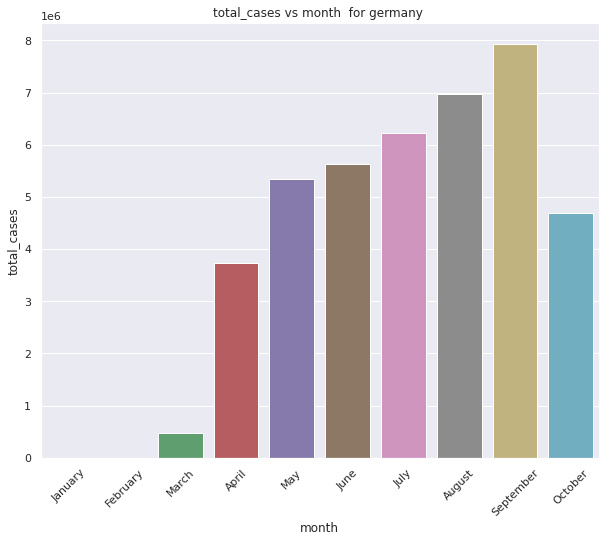

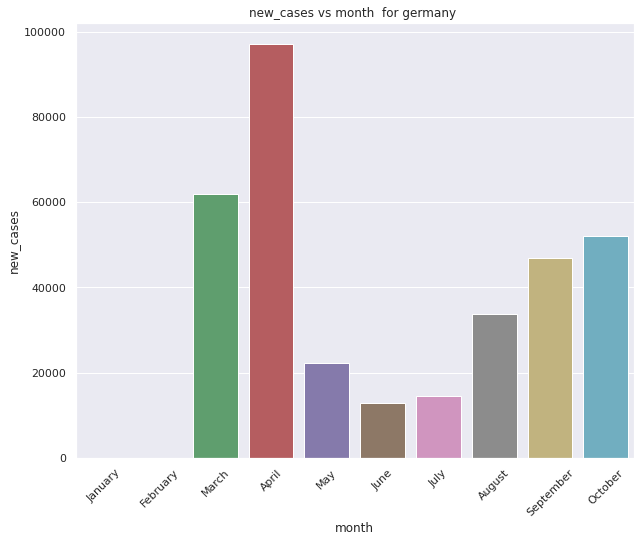

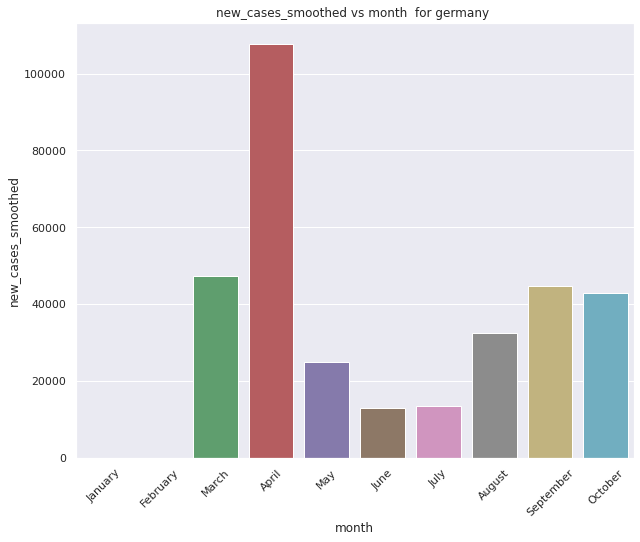

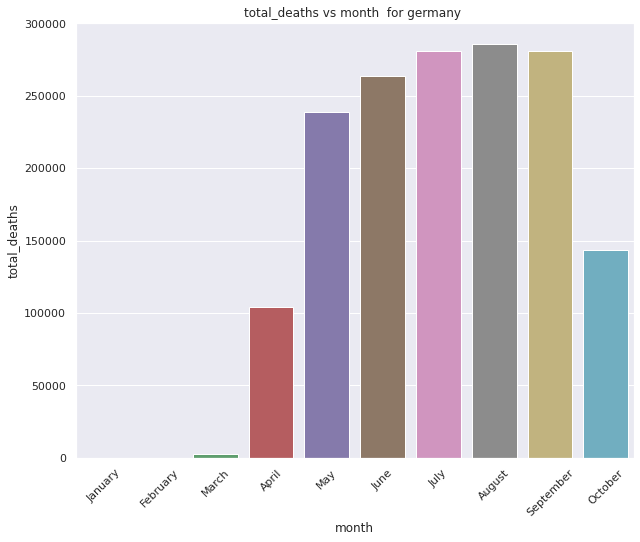

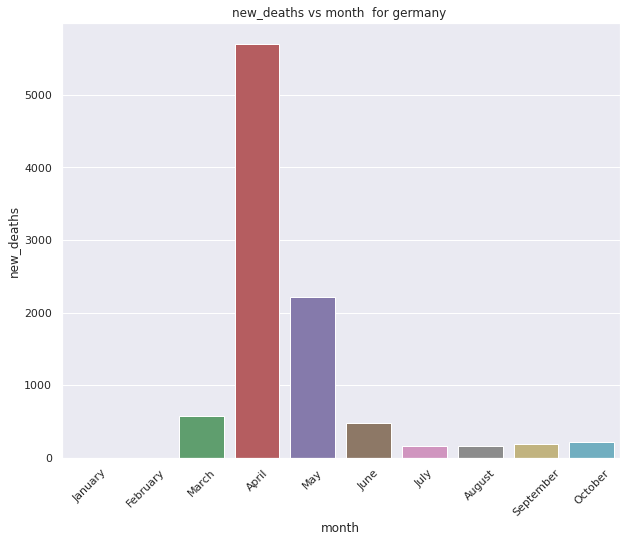

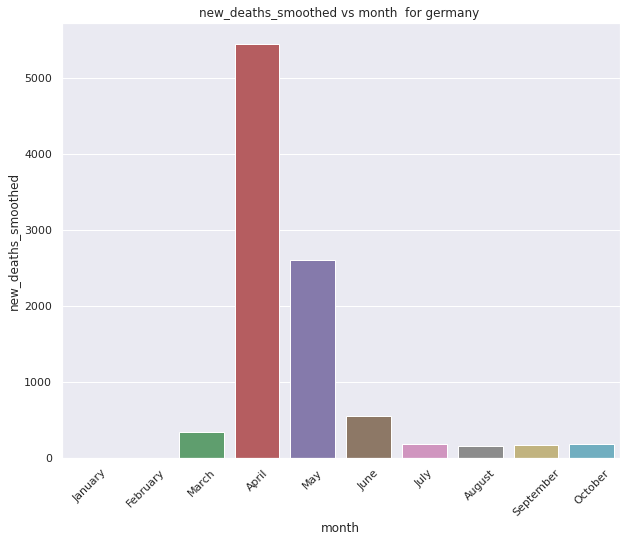

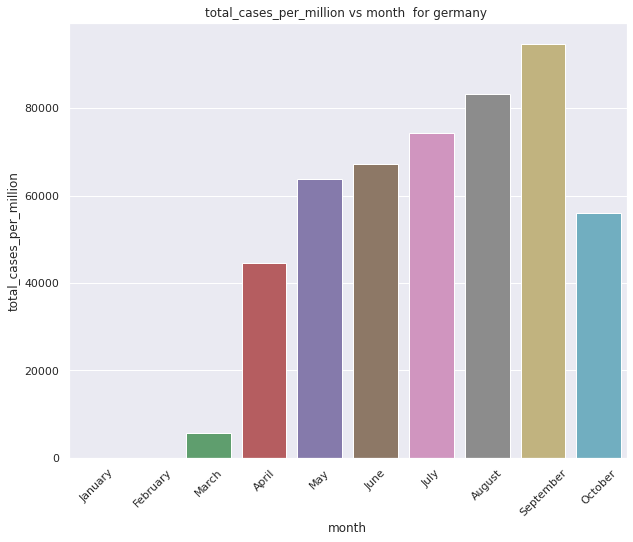

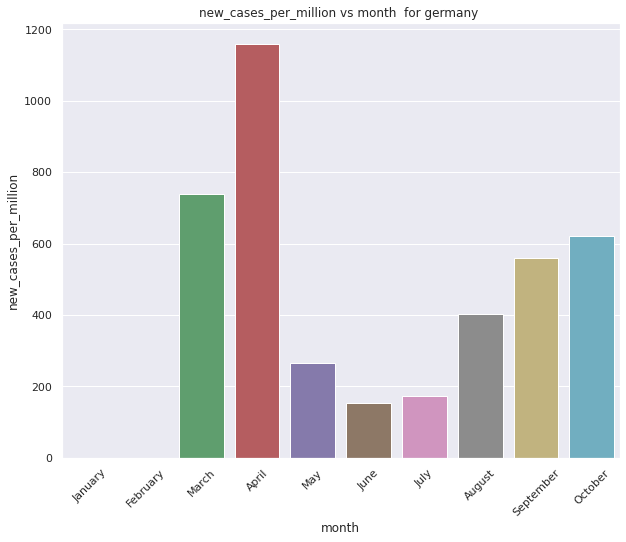

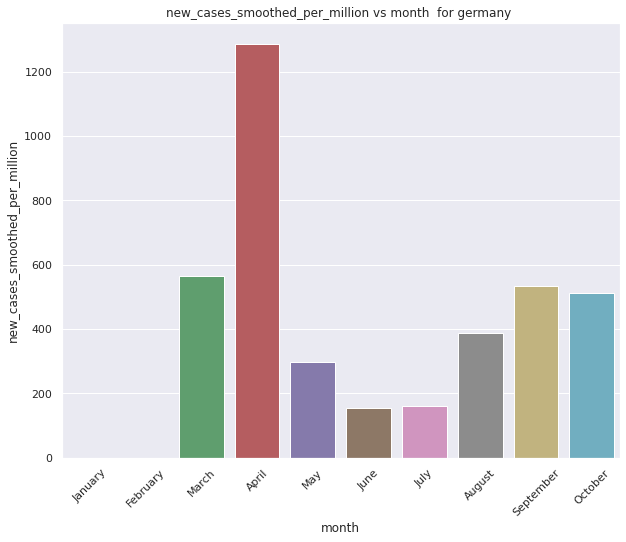

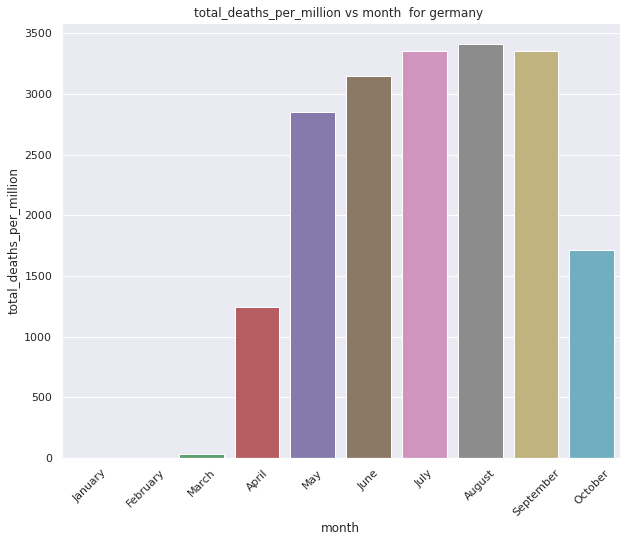

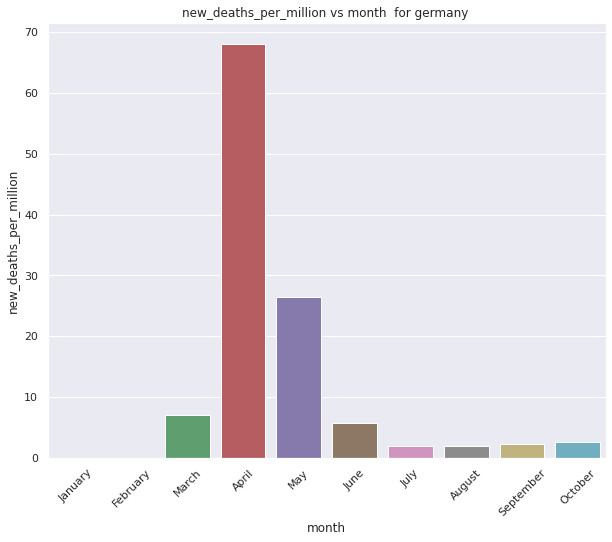

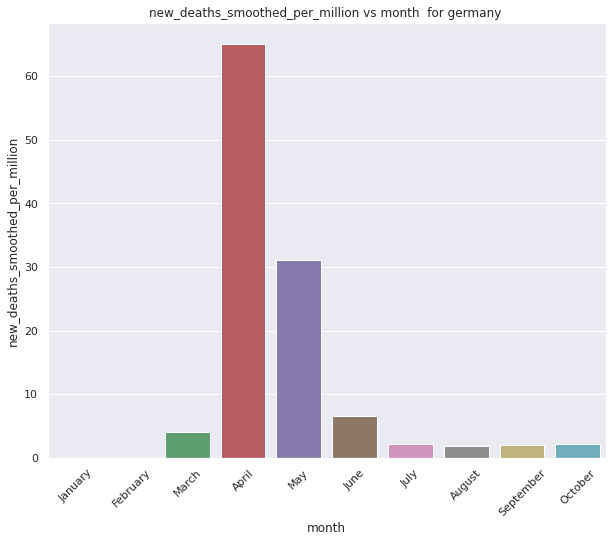

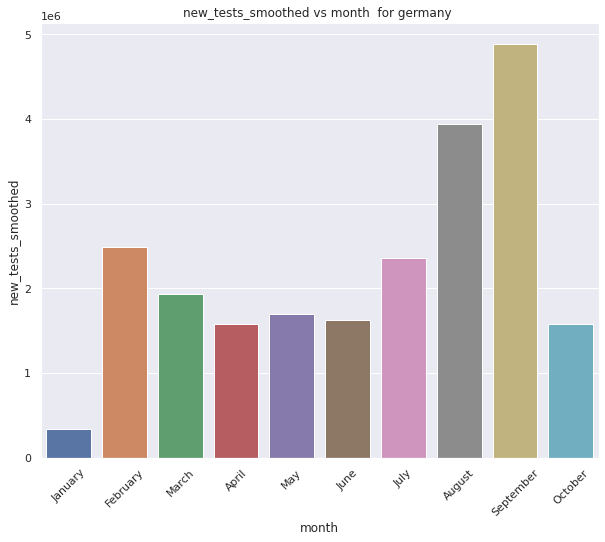

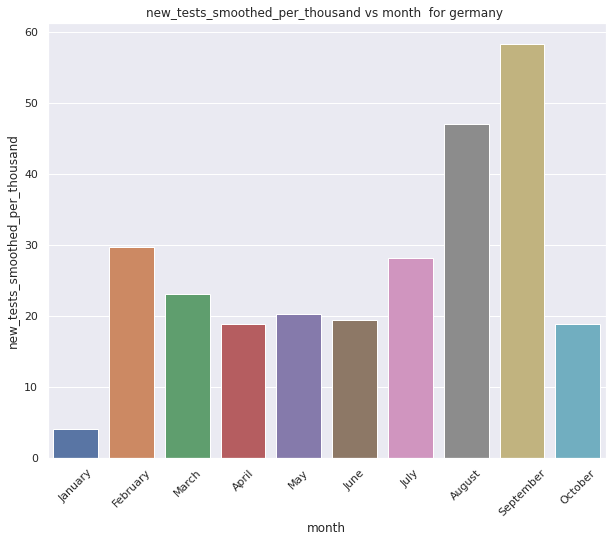

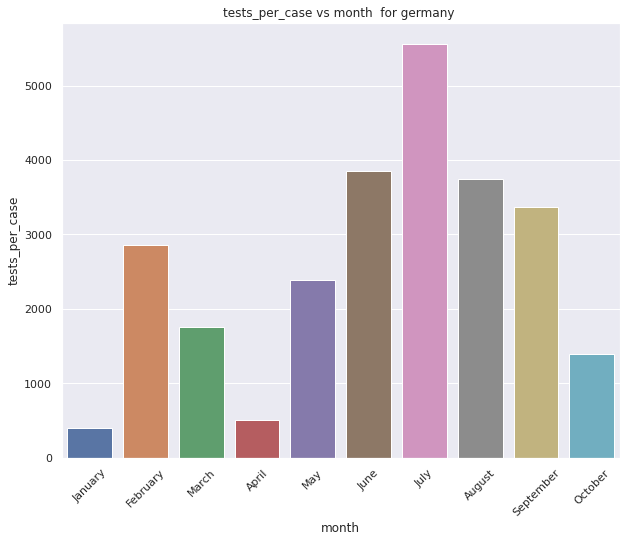

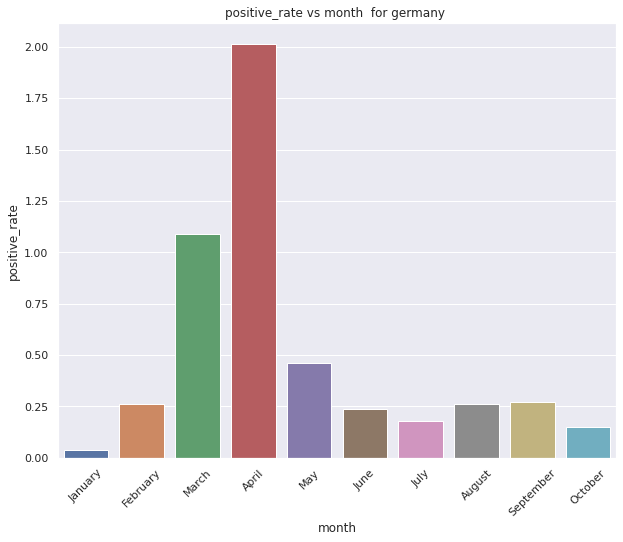

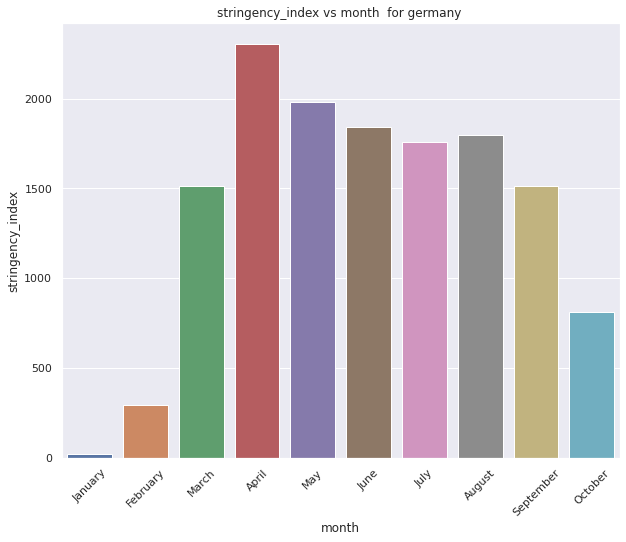

In [ ]:
for i, feature in enumerate(df_grouped.columns):
    plt.figure(i)
    g = sns.barplot(x=df_grouped.index,y=feature,data=df_grouped,ci=None)
    g.set_xticklabels(df_grouped.index, rotation=45)
    g.set_title(feature +" vs month  for germany ")

# The above bar plot gives the variation of cases and other variables with respect to months statring from january to october.

# Plotting the same with help of line plot for better understanding 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

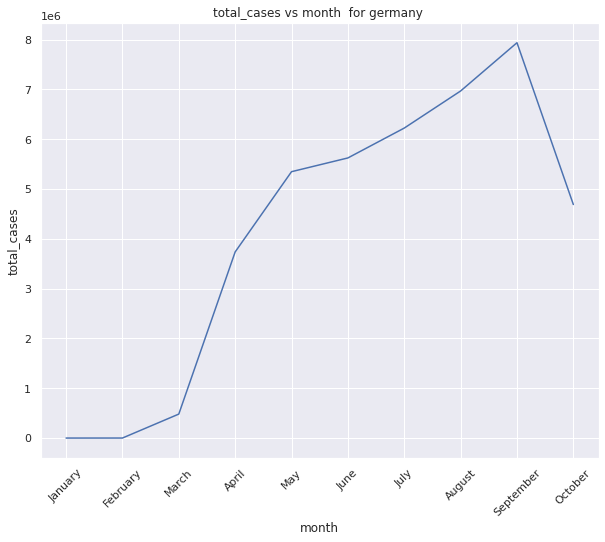

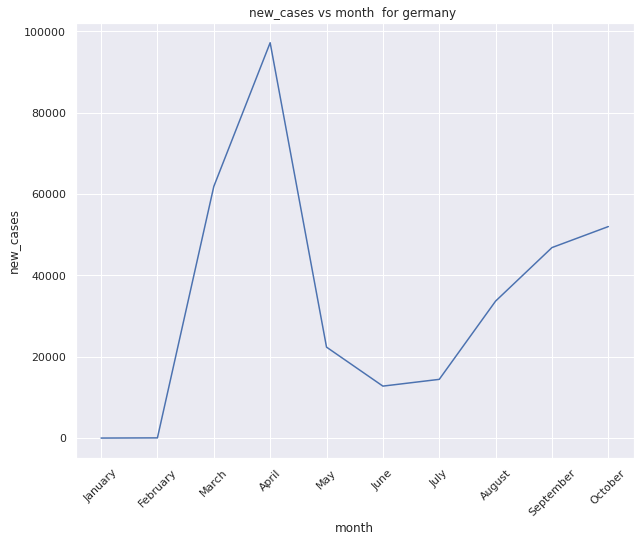

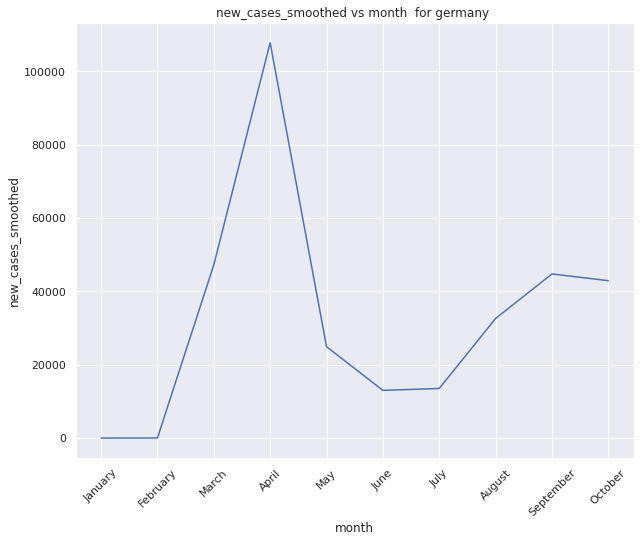

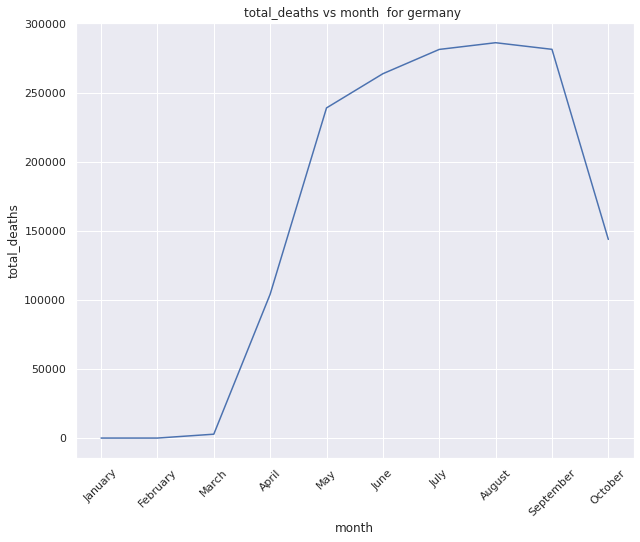

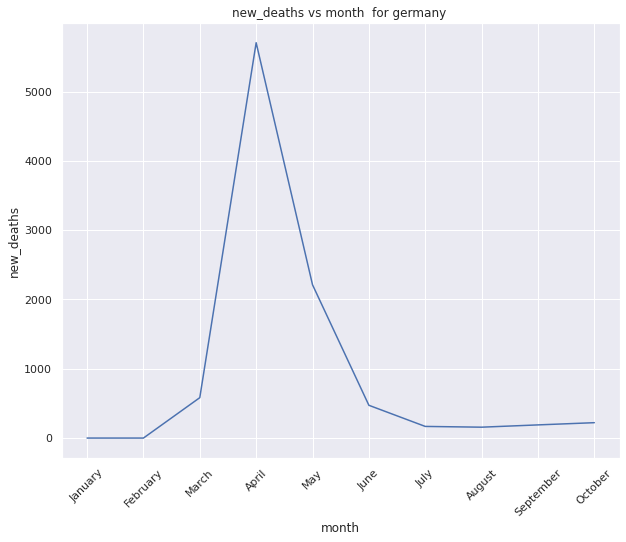

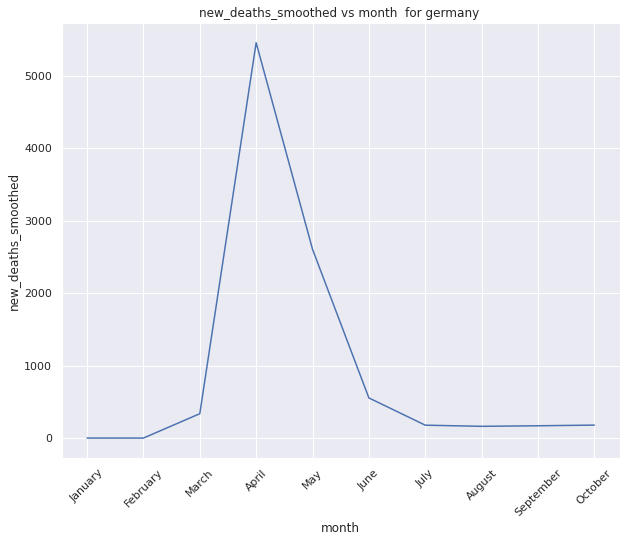

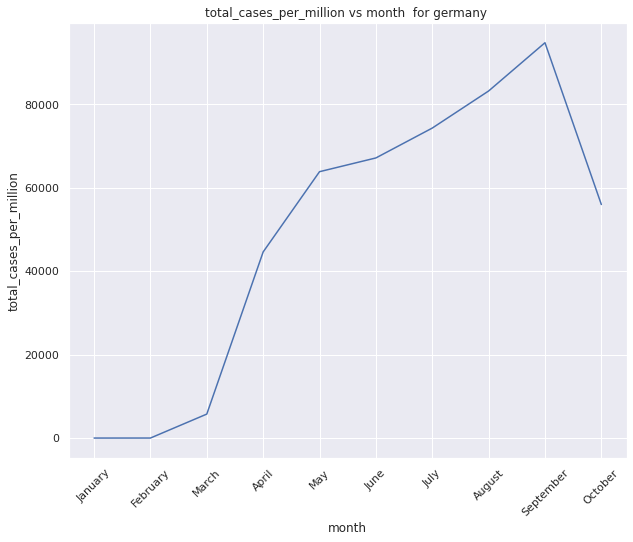

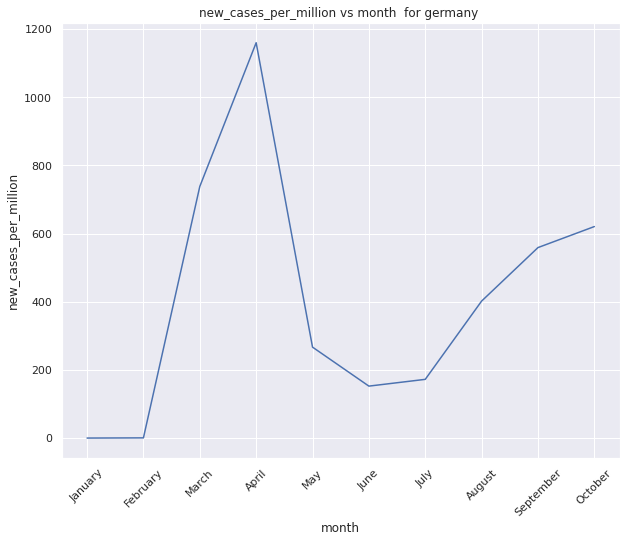

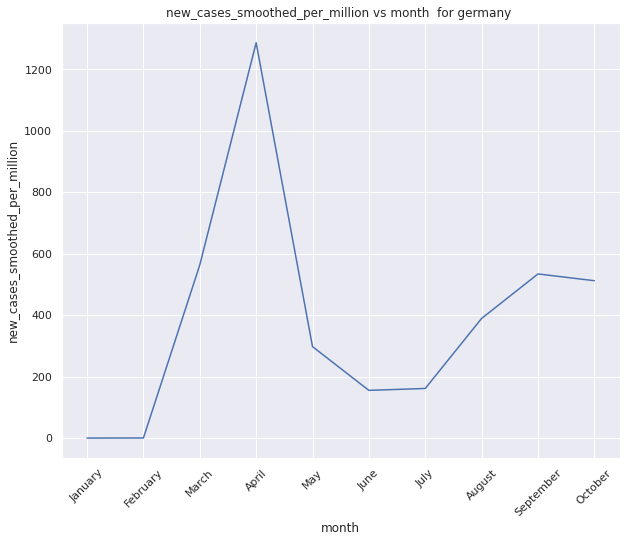

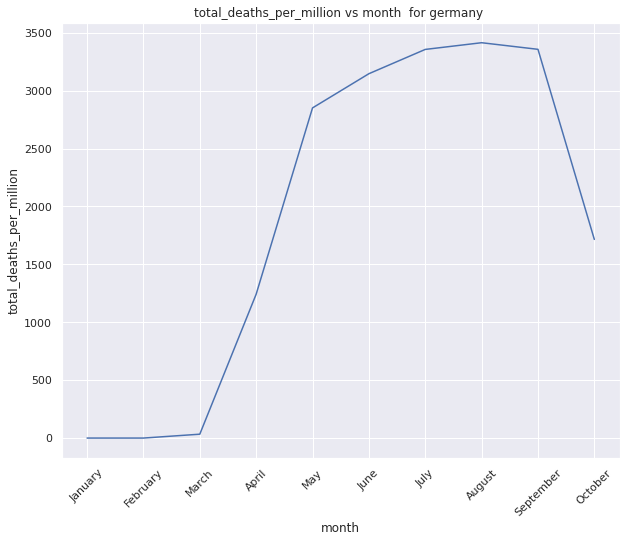

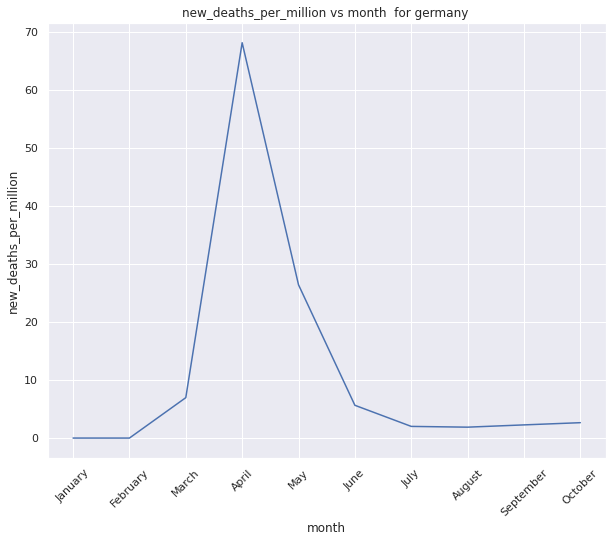

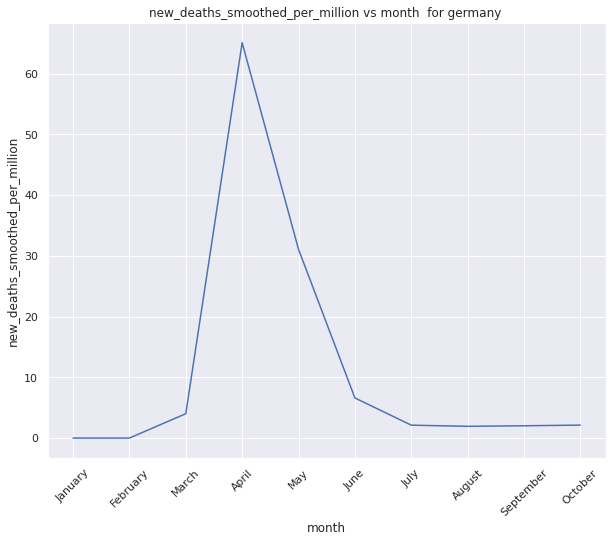

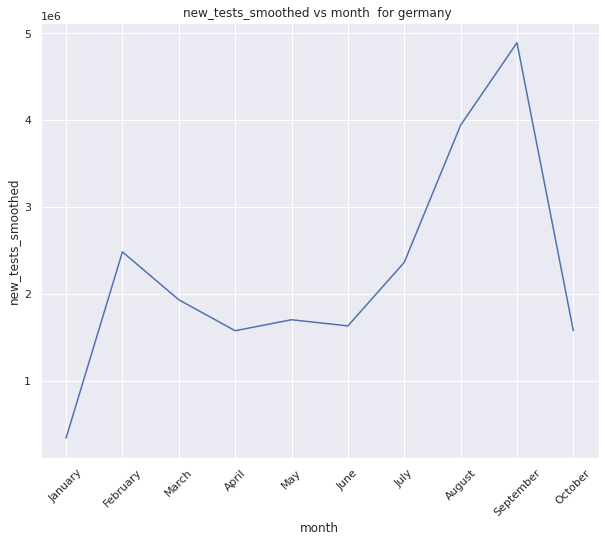

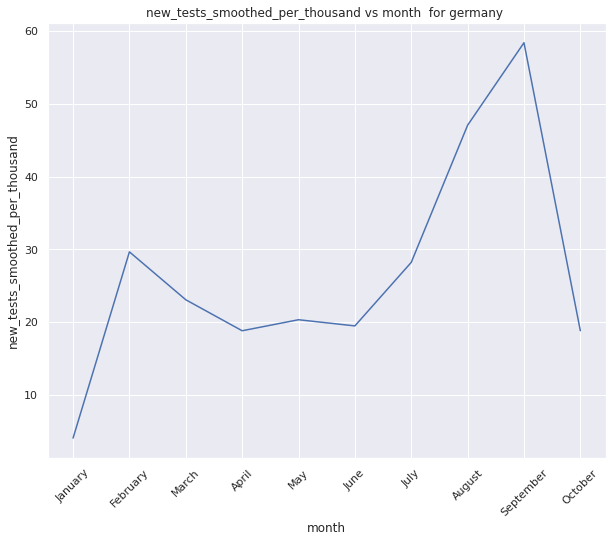

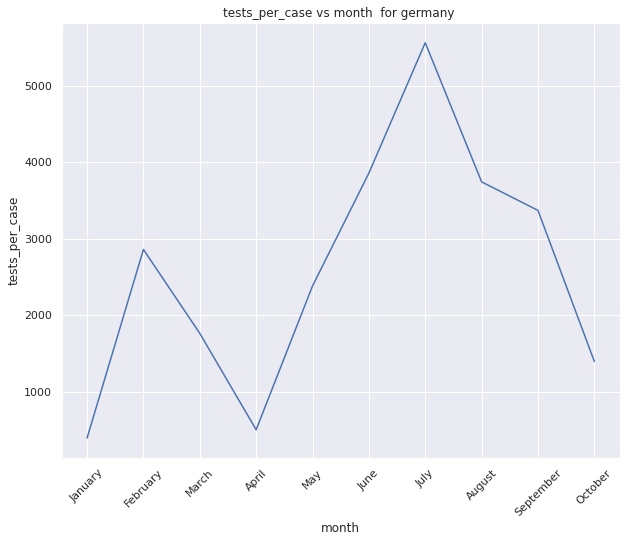

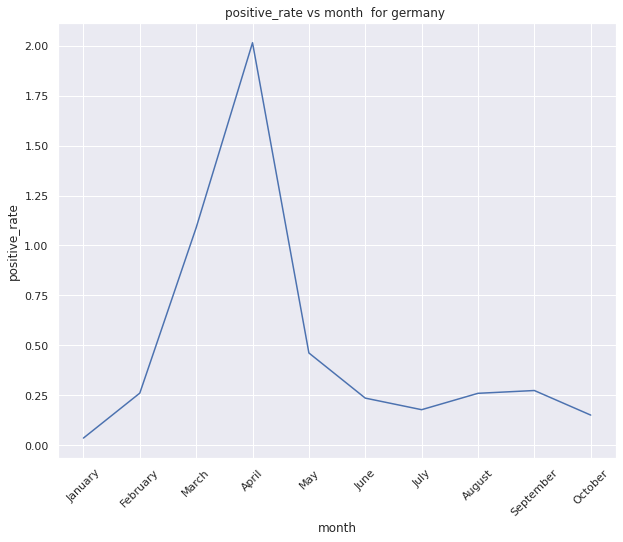

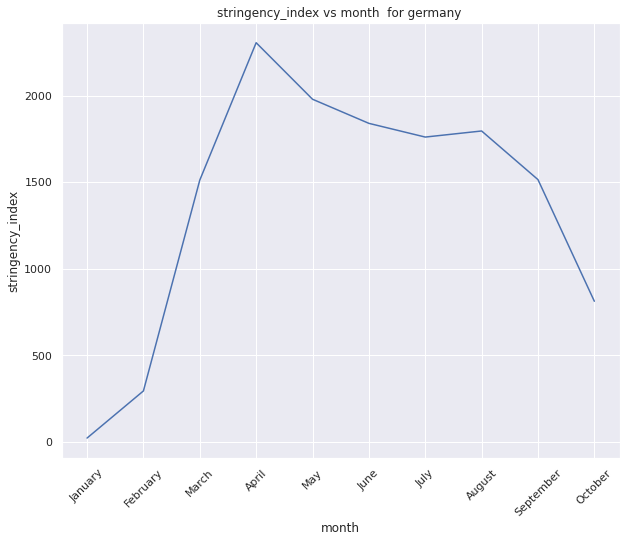

In [ ]:
for i, feature in enumerate(df_grouped.columns):
    plt.figure(i)
    g = sns.lineplot(x=df_grouped.index,y=feature,data=df_grouped)
    g.set_xticklabels(df_grouped.index, rotation=45)
    g.set_title(feature +" vs month  for germany ")

Recovery of people varied for each day.

Text(0.5, 1.0, 'date  vs month  for germany ')

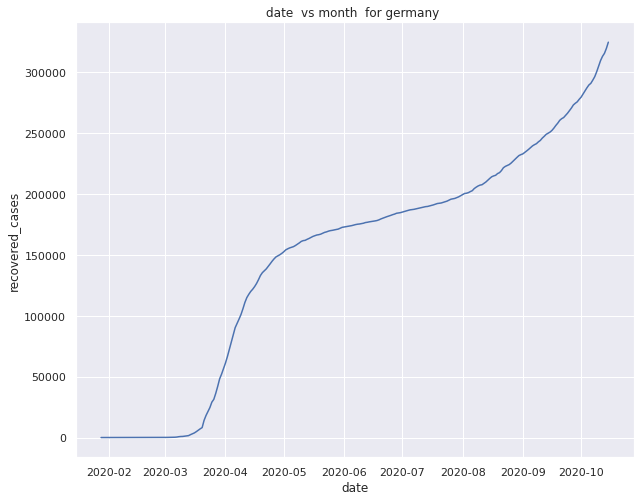

In [ ]:
g = sns.lineplot(x=df_germany.date,y='recovered_cases',data=df_germany)
#g.set_xticklabels(df_grouped.index, rotation=45)
g.set_title("date  vs month  for germany ")

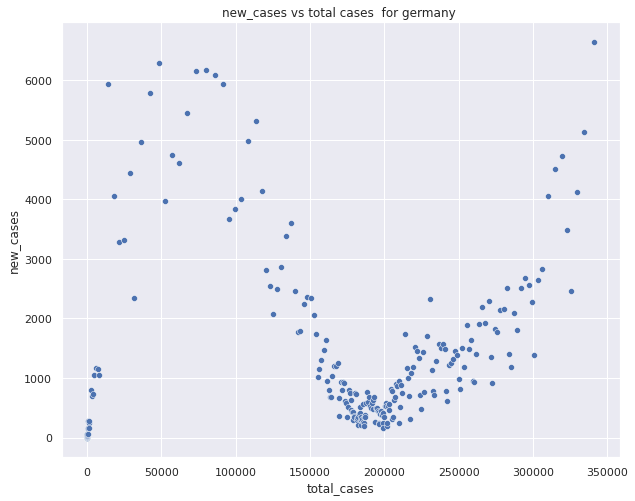

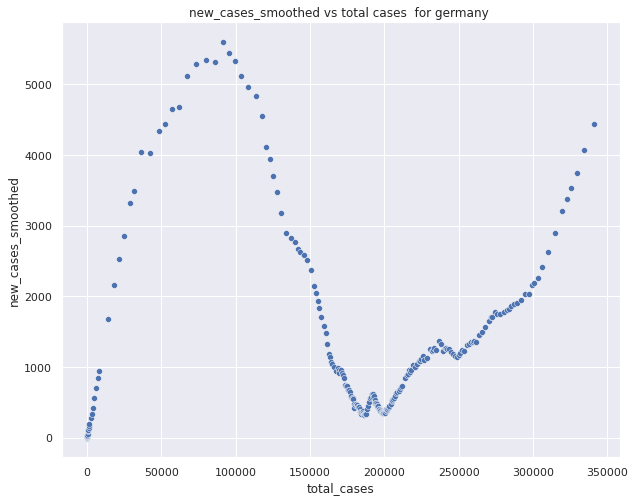

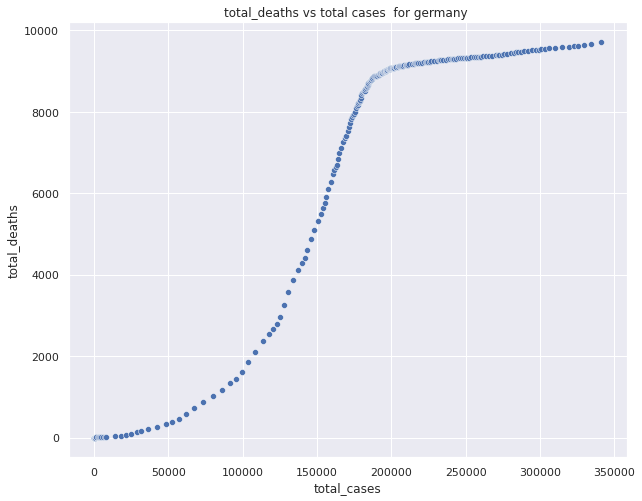

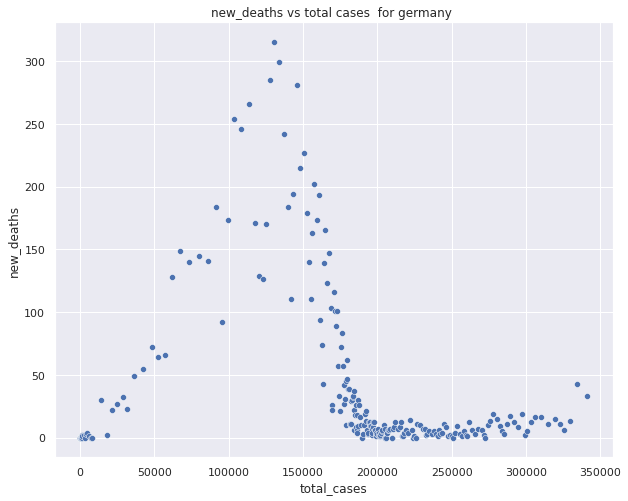

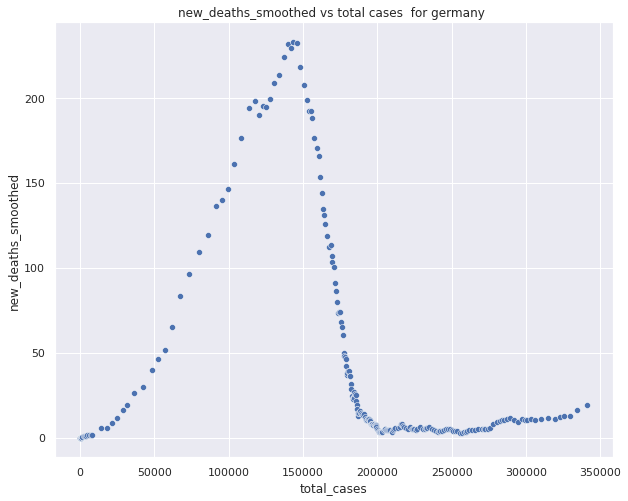

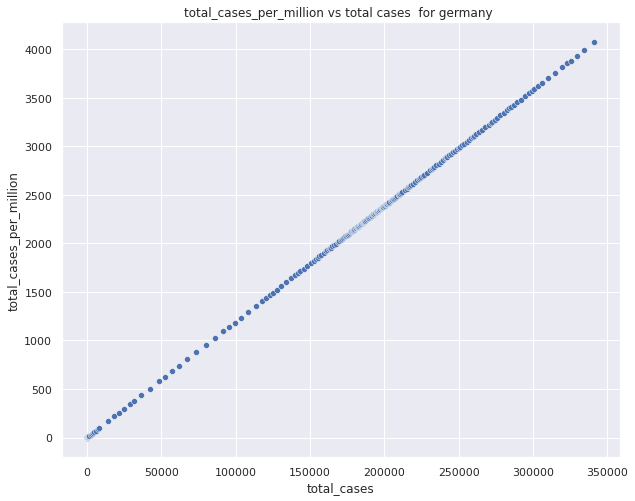

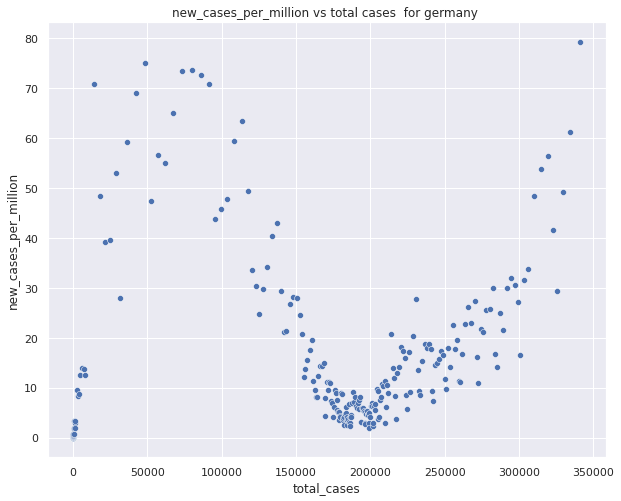

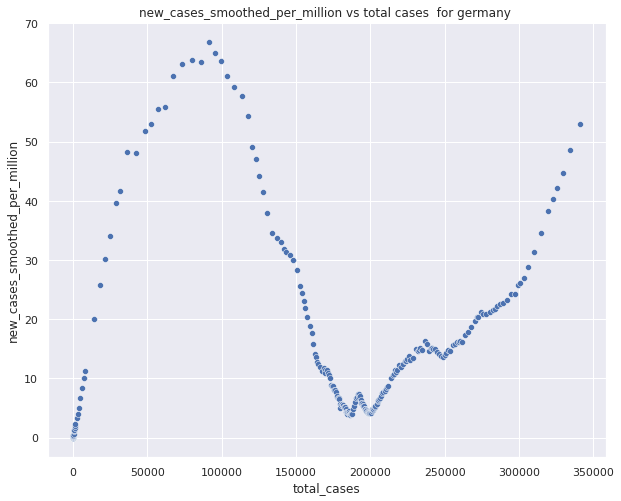

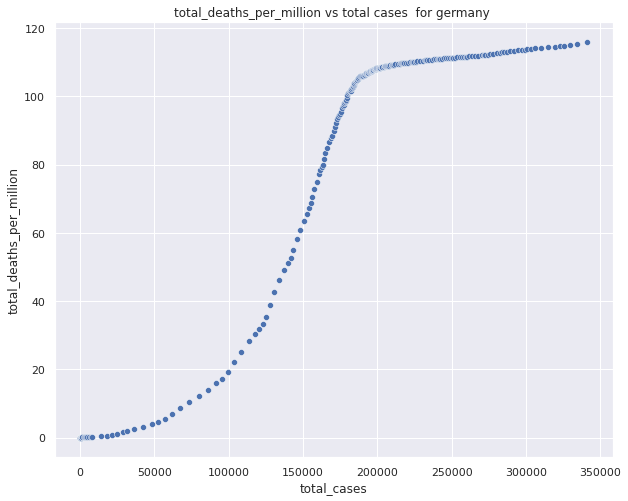

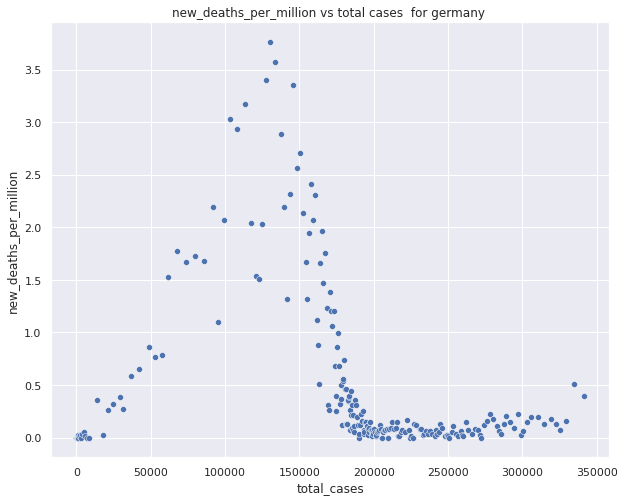

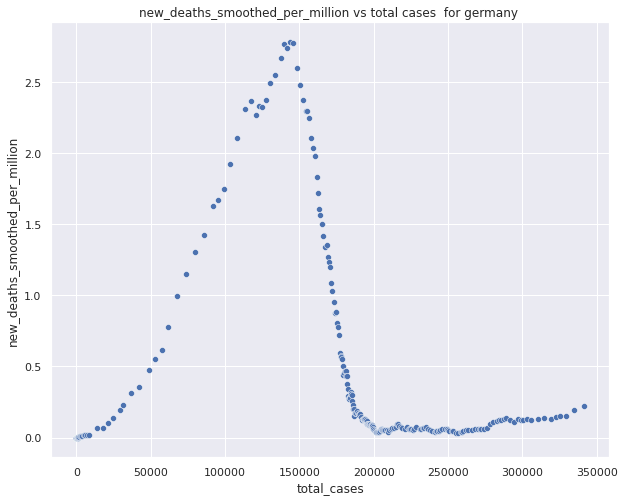

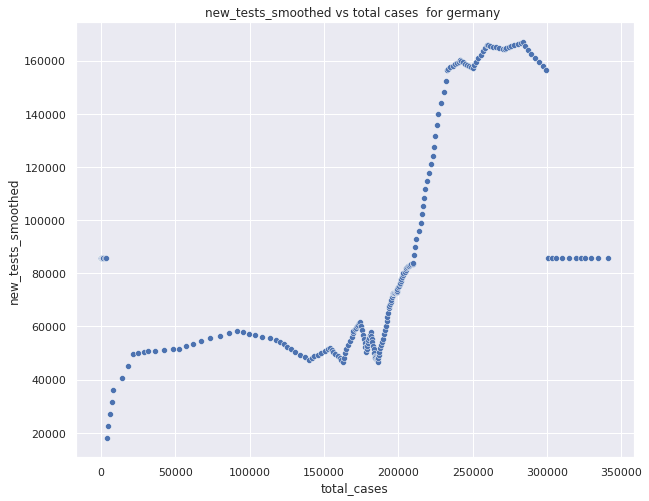

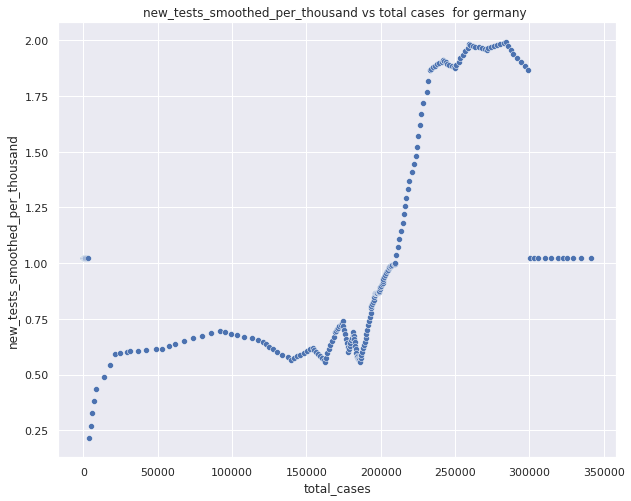

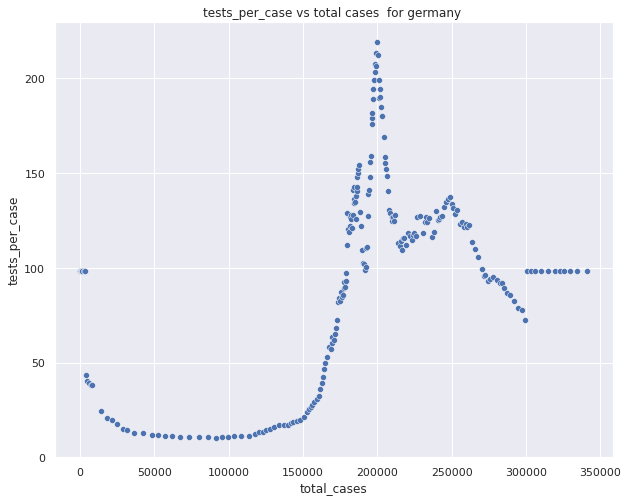

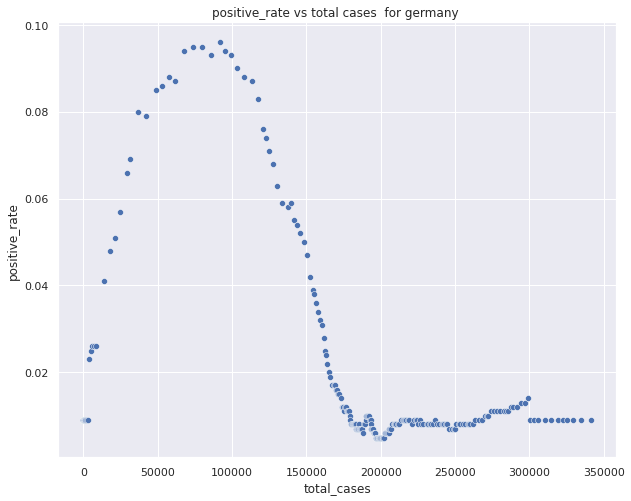

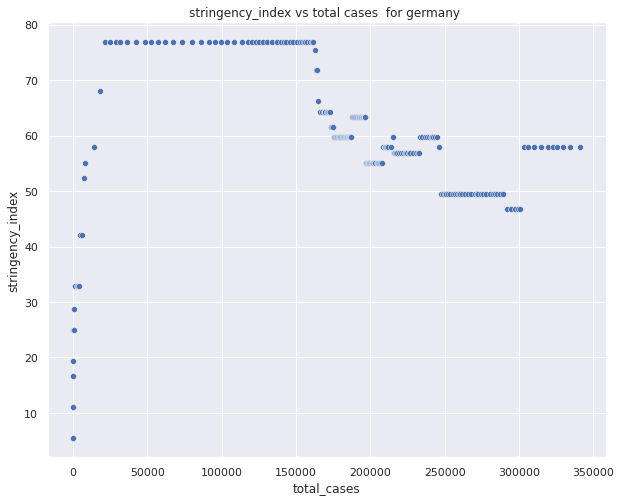

In [ ]:
for i, feature in enumerate(df_germany_new.columns[2:]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany_new.total_cases,y=feature,data=df_germany_new).set_title(feature +" vs total cases  for germany ")

# The above plots are scatter plots  between total cases and other variables 

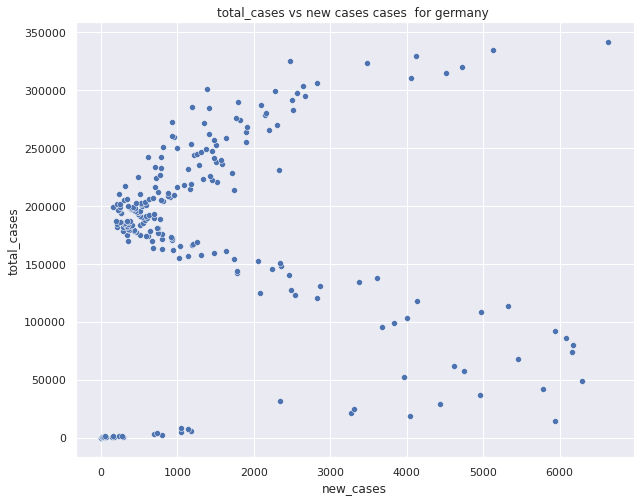

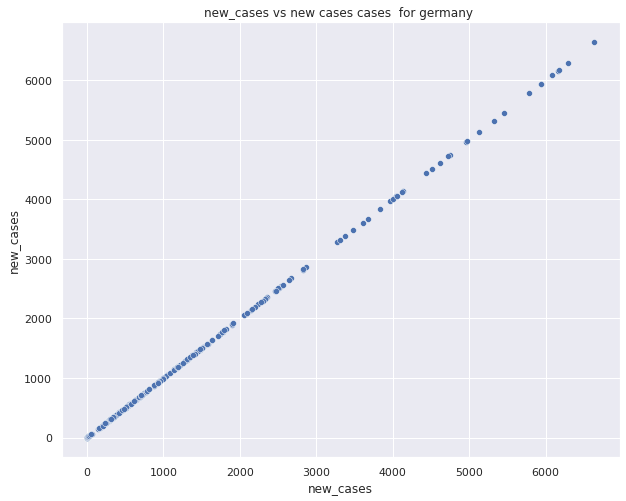

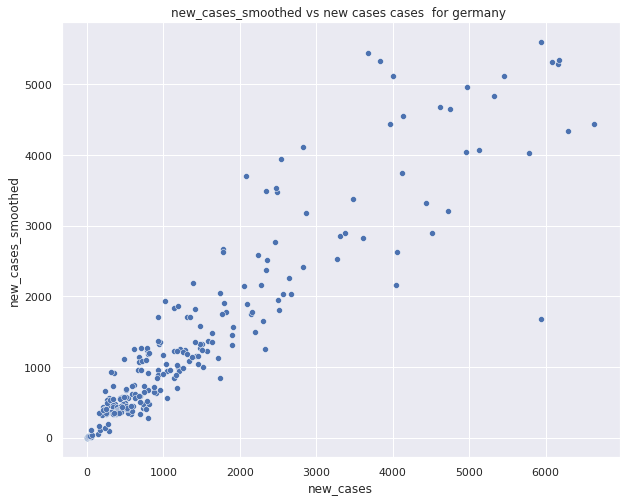

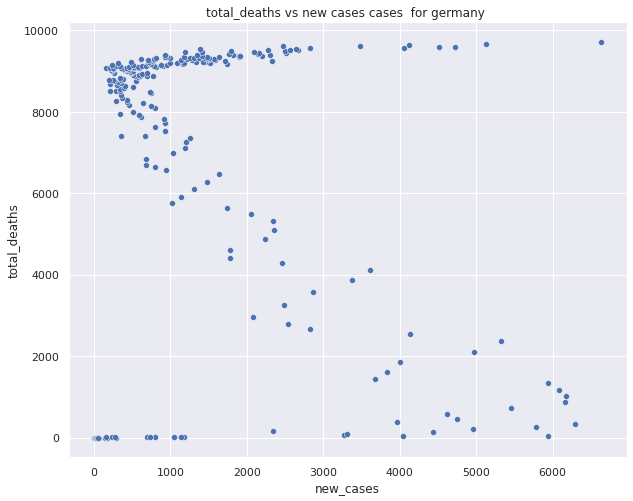

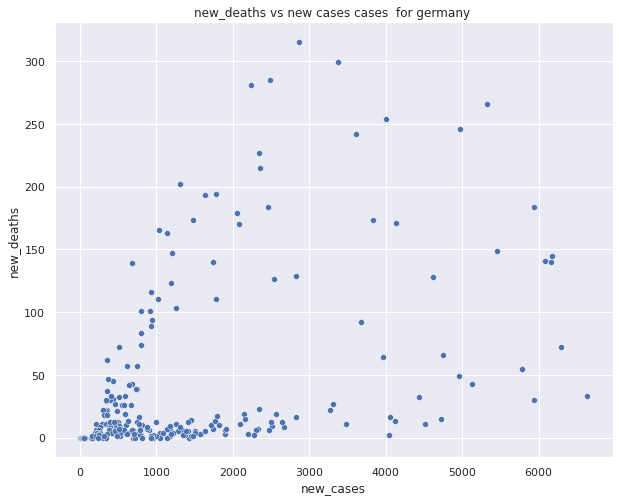

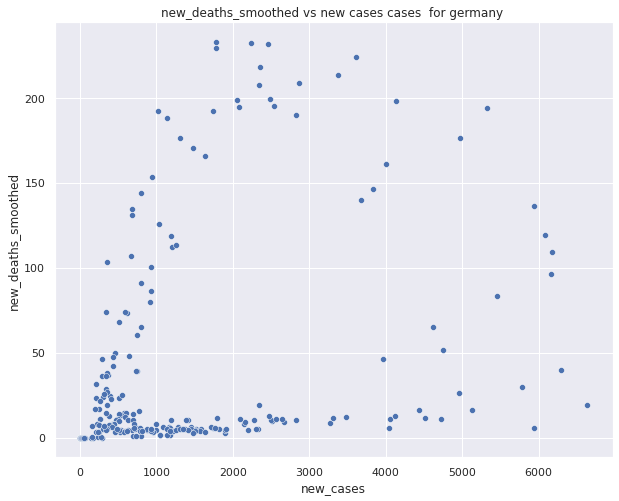

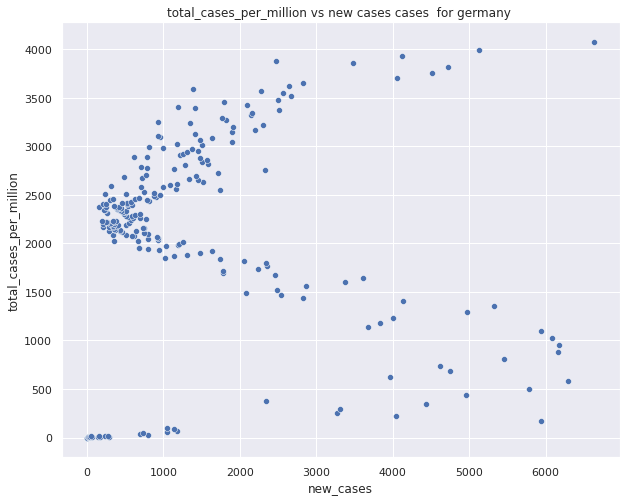

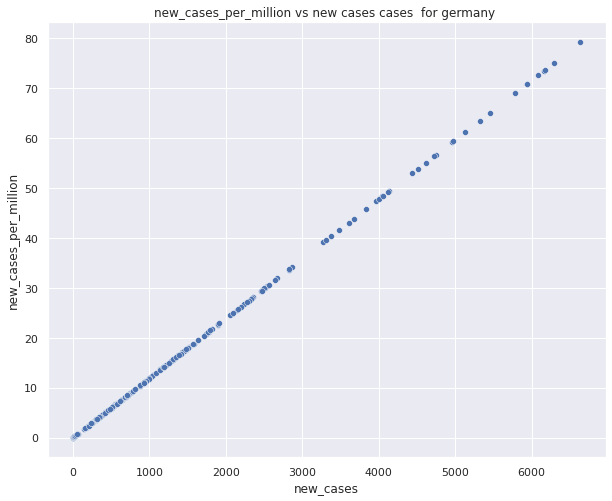

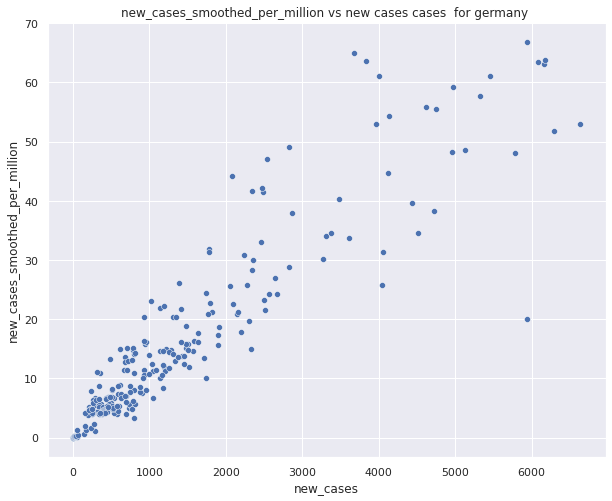

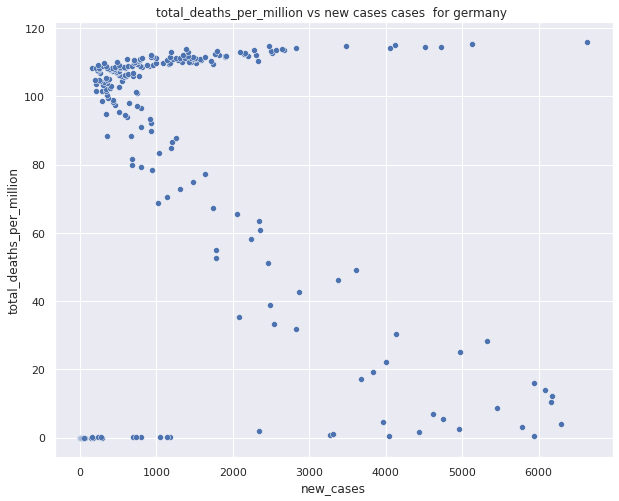

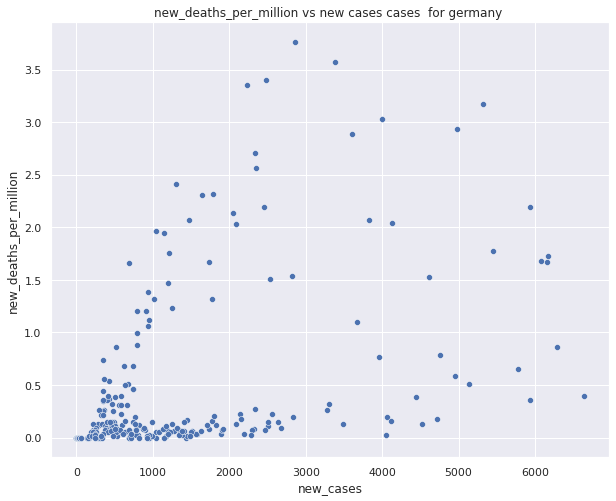

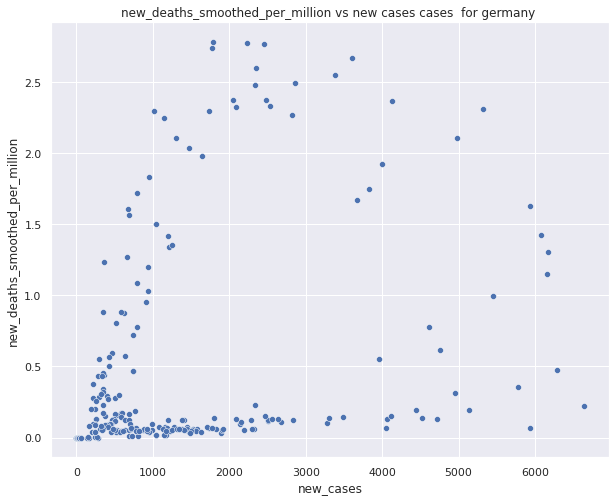

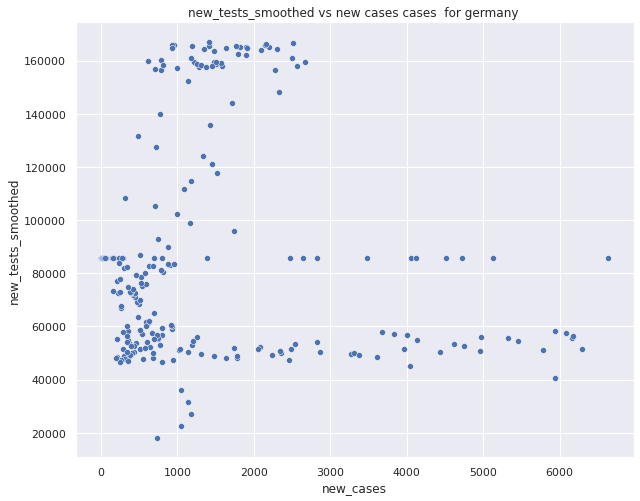

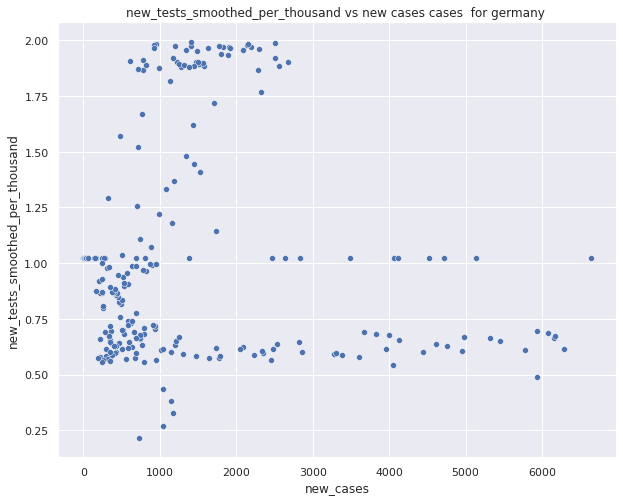

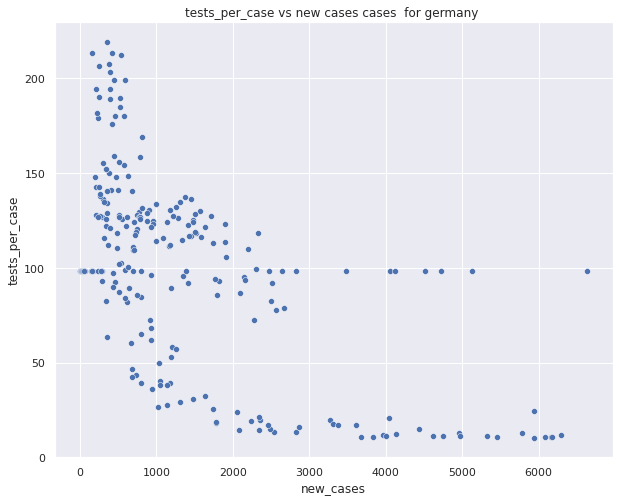

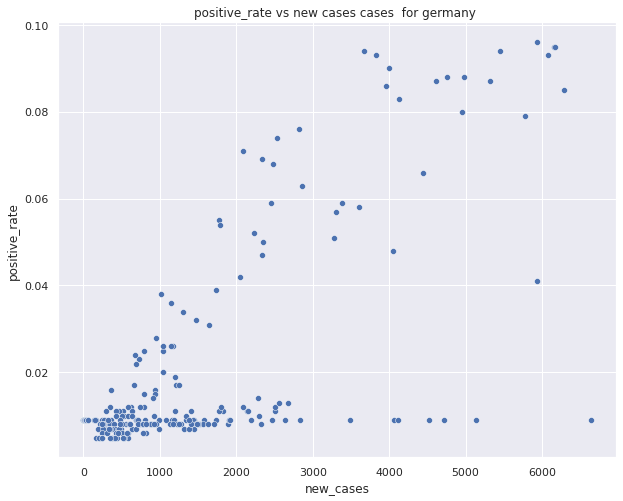

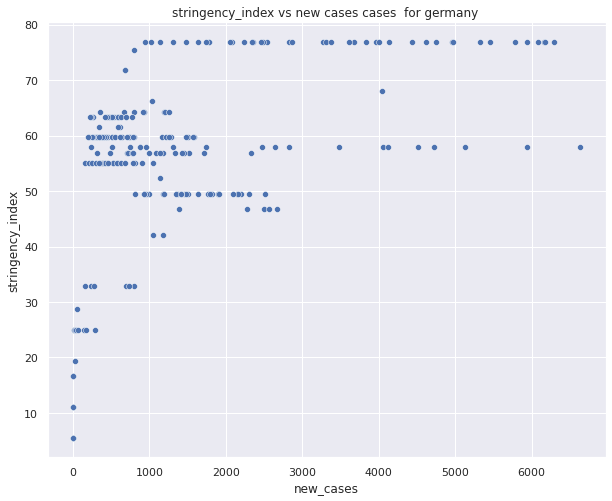

In [ ]:
for i, feature in enumerate(df_germany_new.columns[1:]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany_new.new_cases,y=feature,data=df_germany_new).set_title(feature +" vs new cases cases  for germany ")

# The above plots are scatter plots  between new cases and other variables 

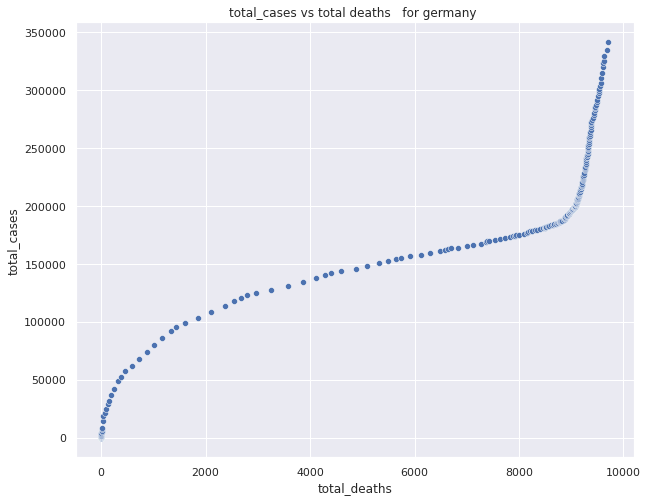

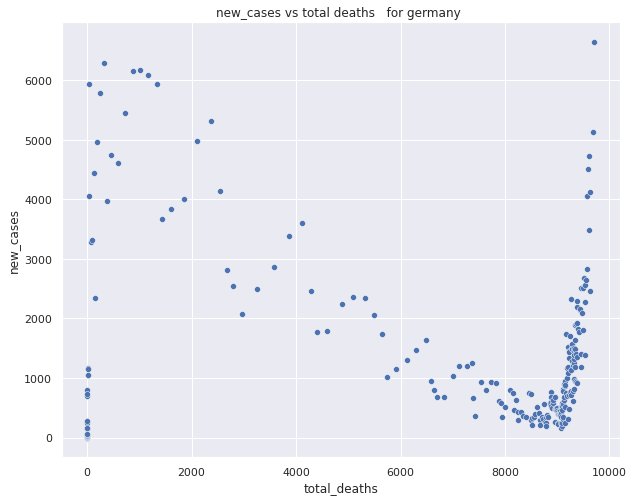

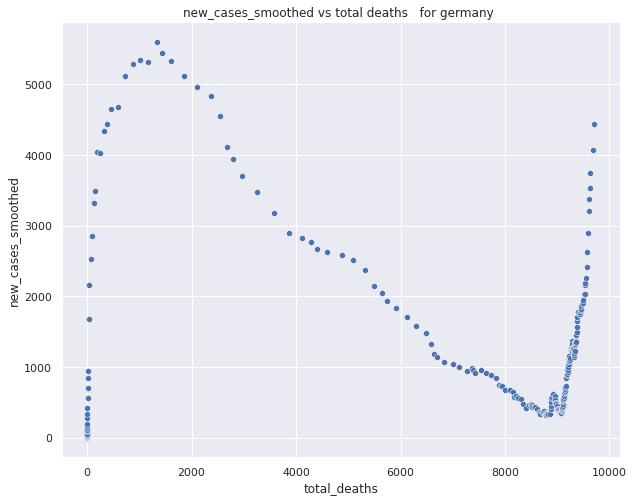

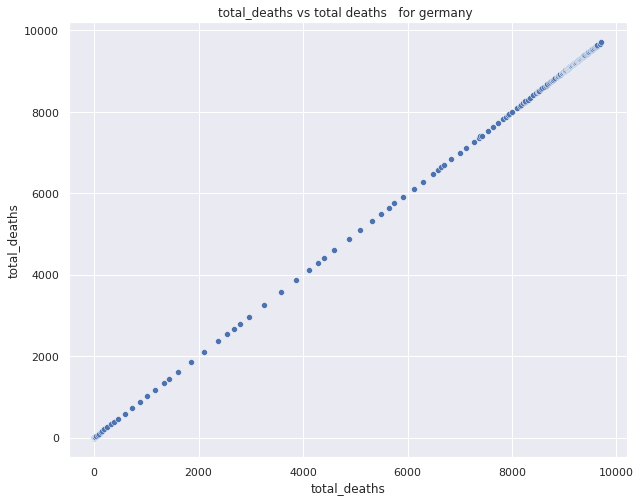

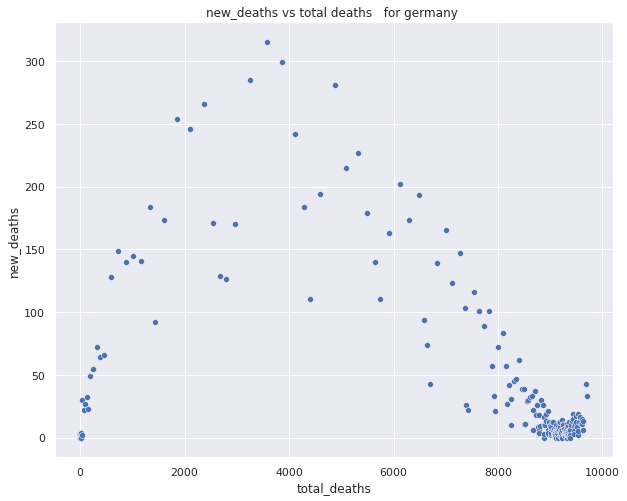

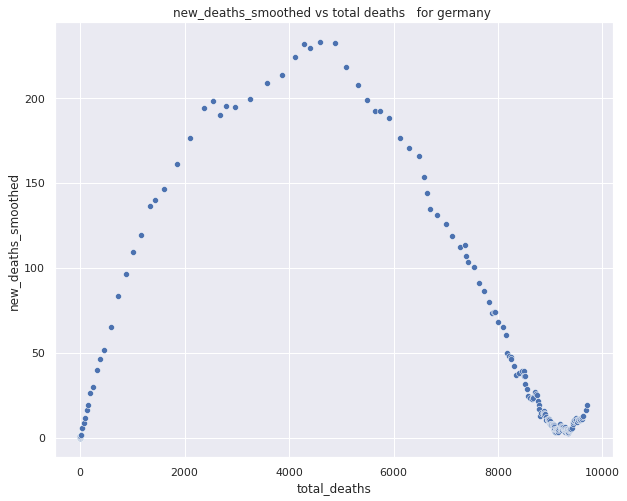

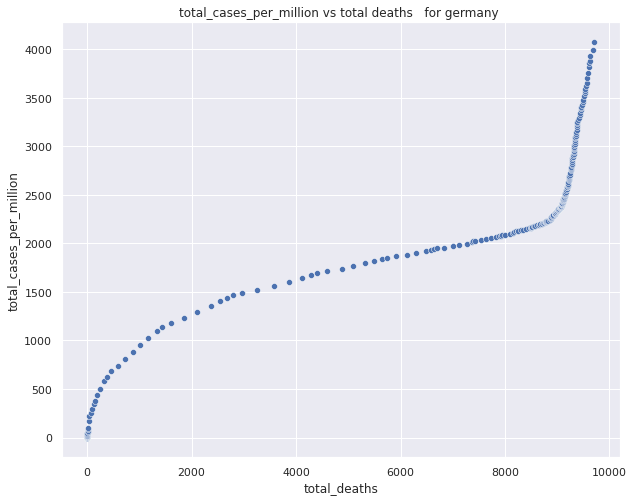

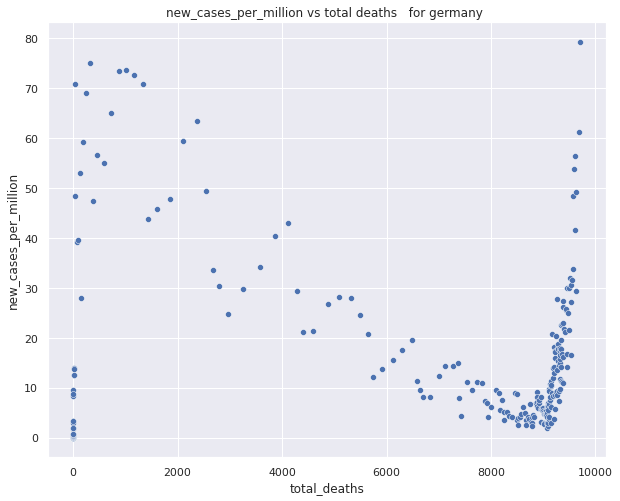

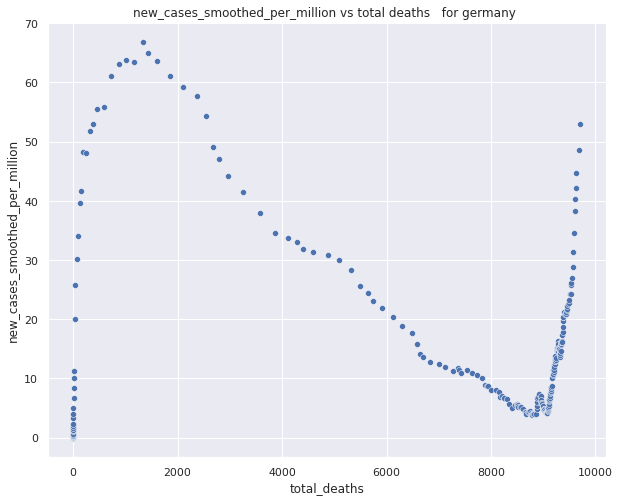

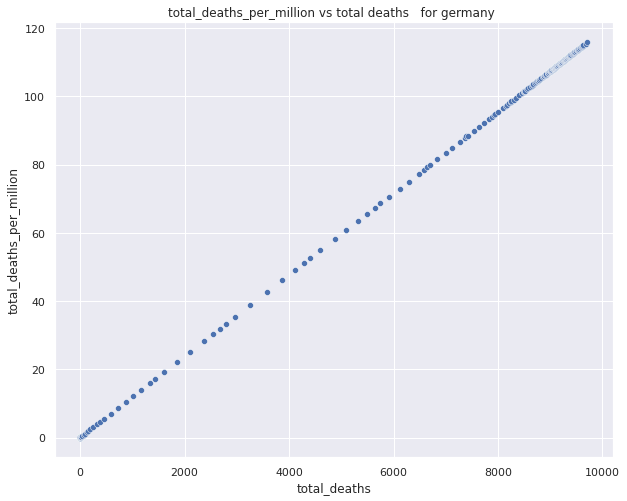

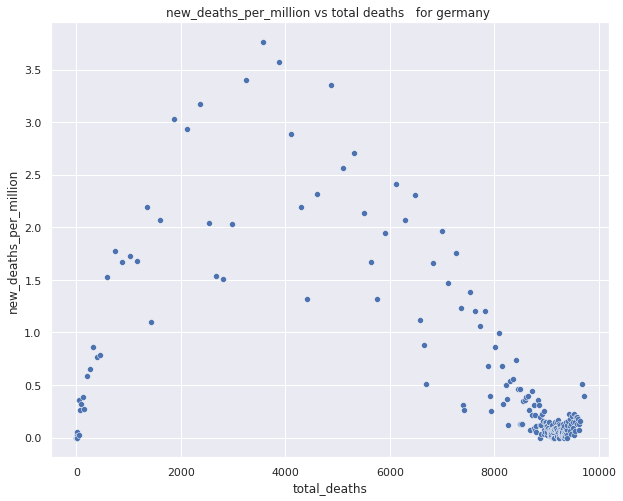

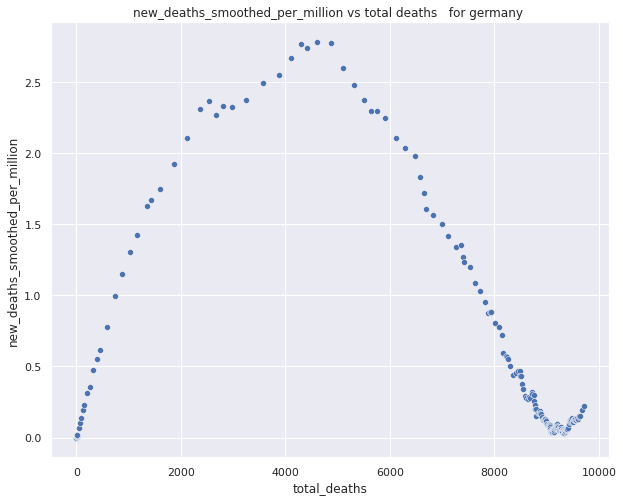

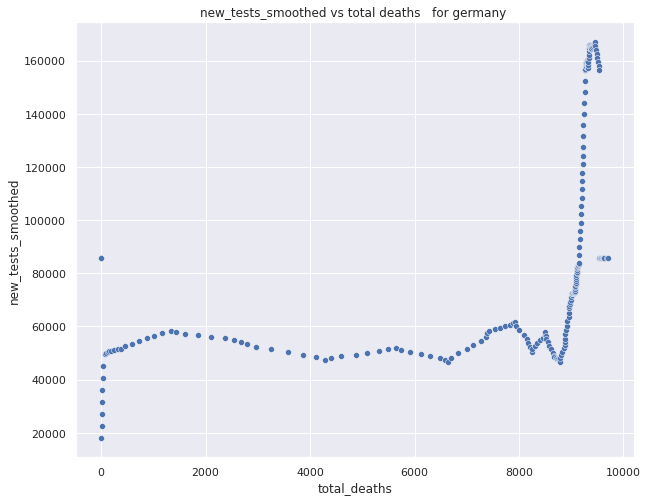

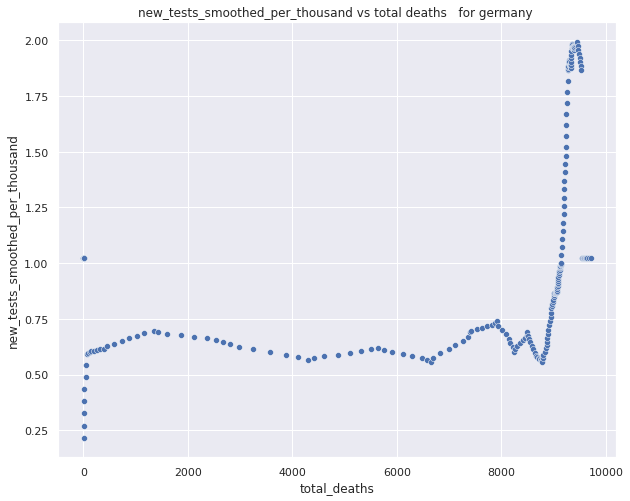

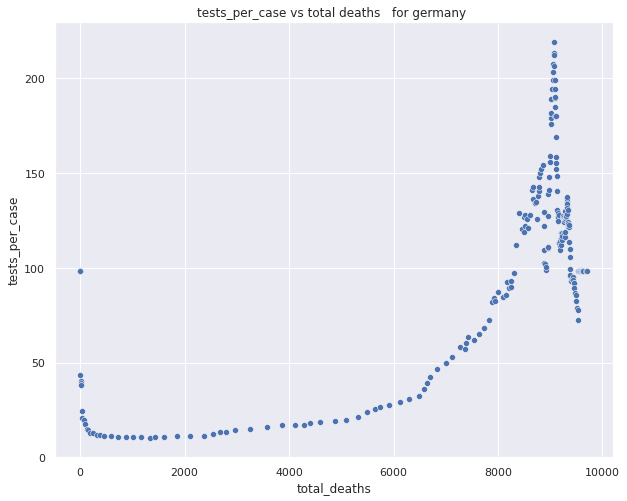

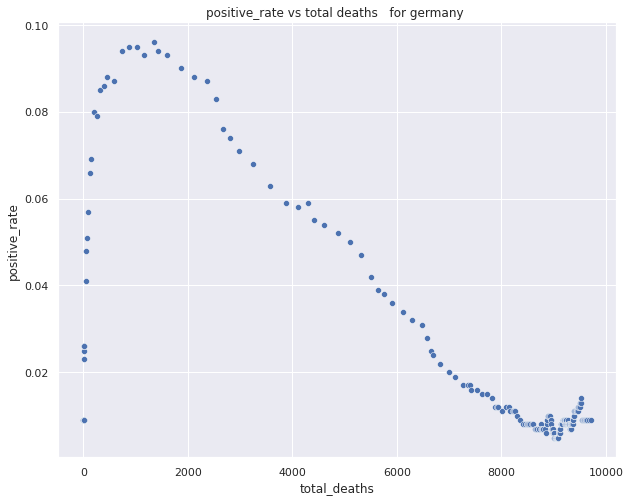

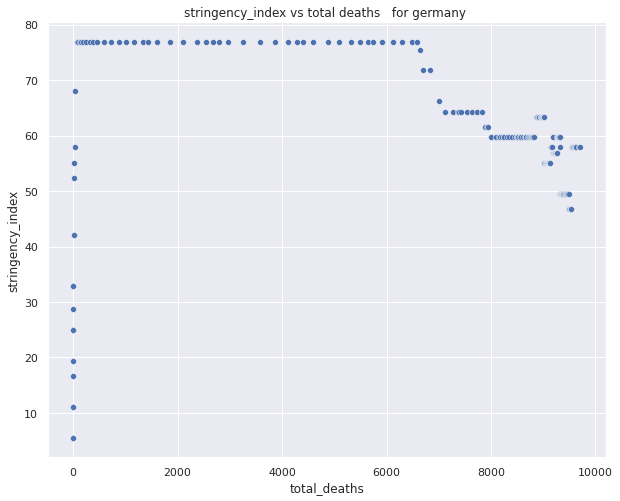

In [ ]:
for i, feature in enumerate(df_germany_new.columns[1:]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany_new.total_deaths,y=feature,data=df_germany_new).set_title(feature +" vs total deaths   for germany ")

# The above plots are scatter plots  between total_deaths and other variables 

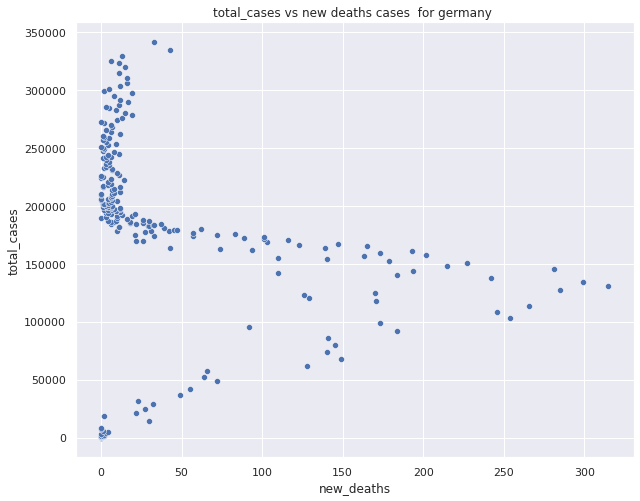

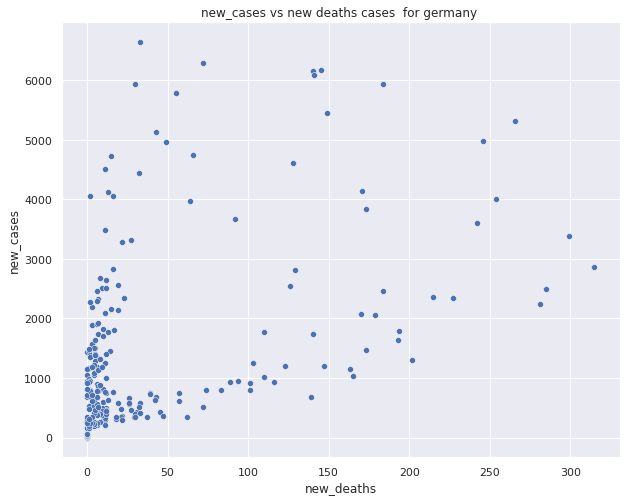

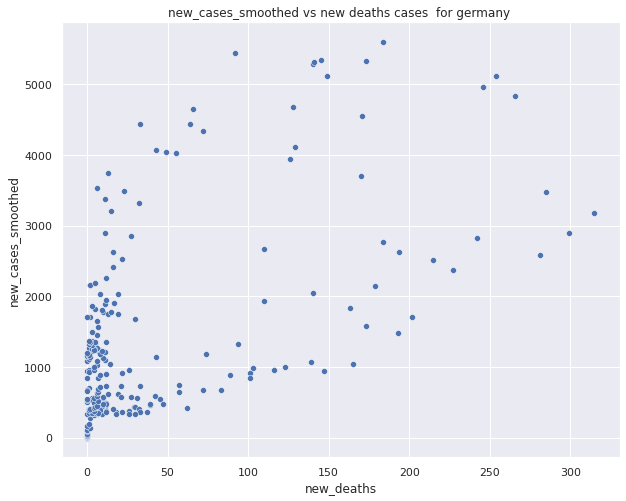

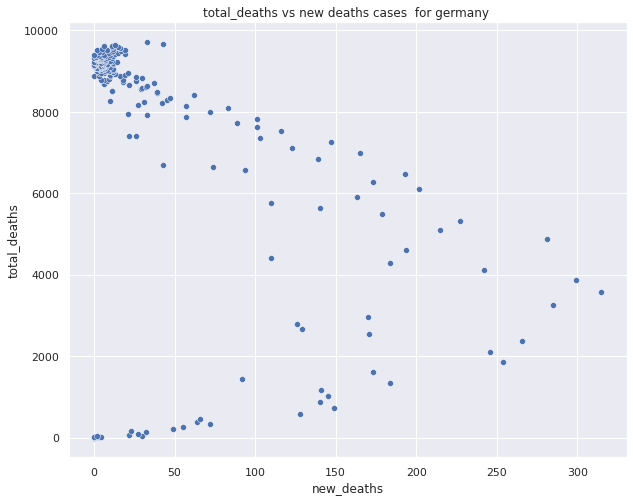

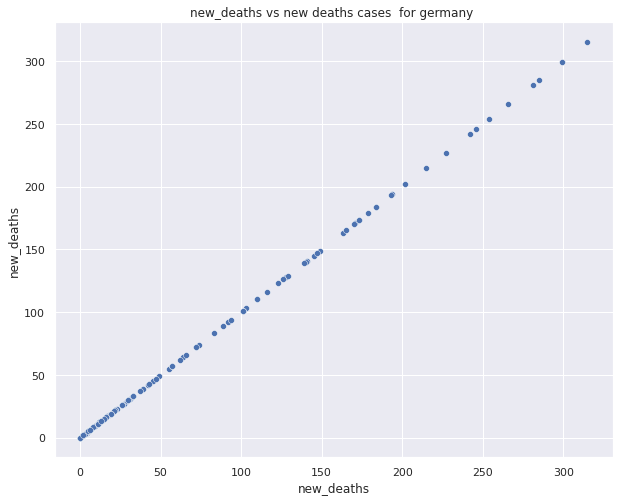

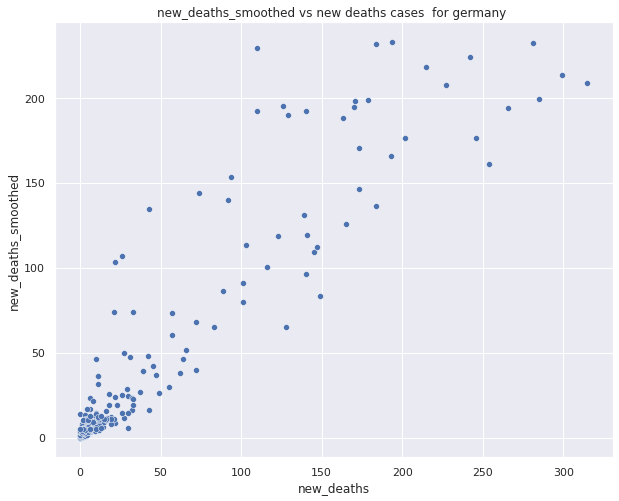

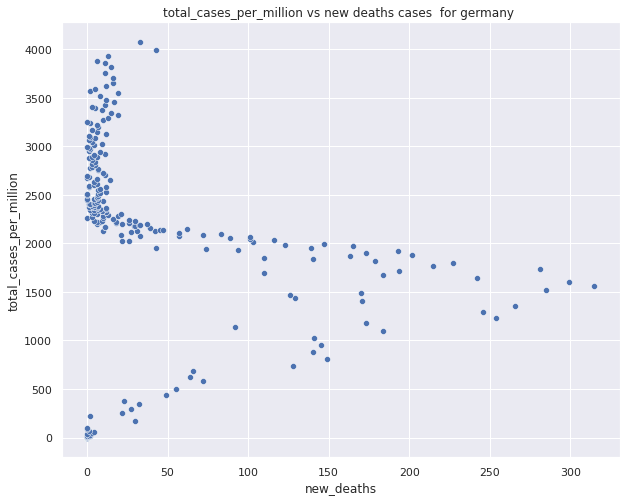

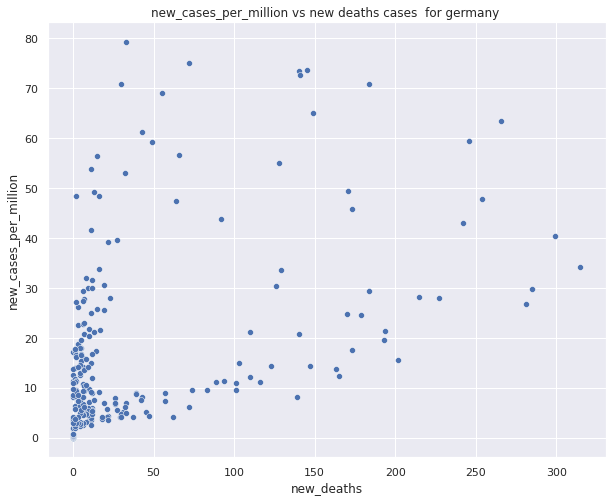

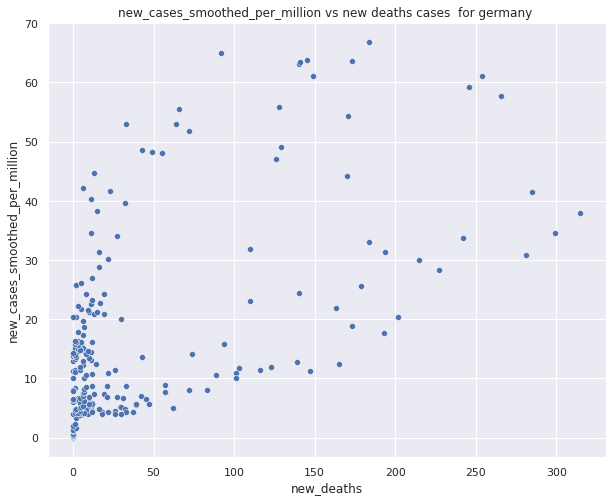

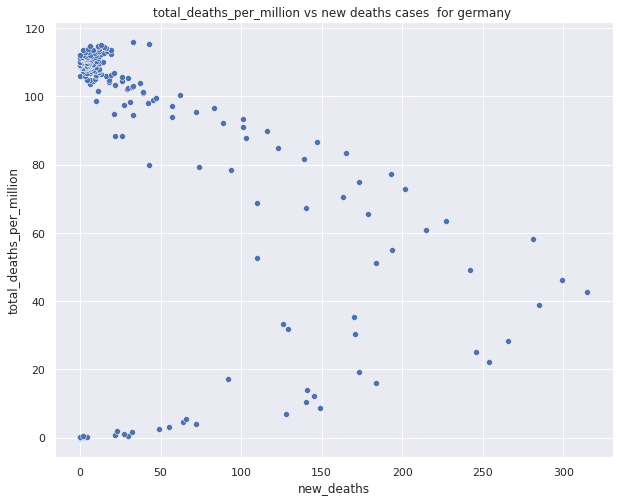

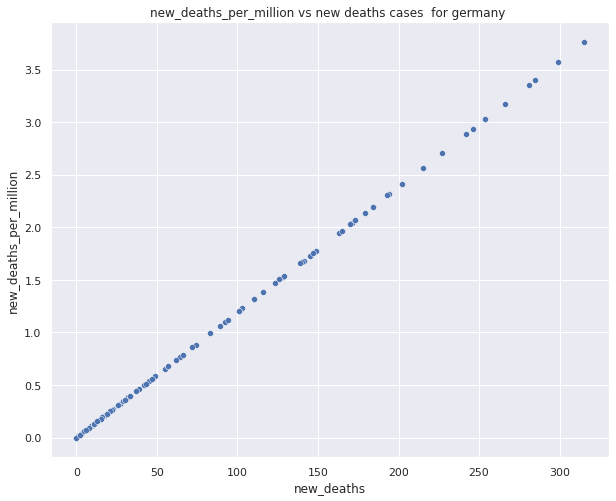

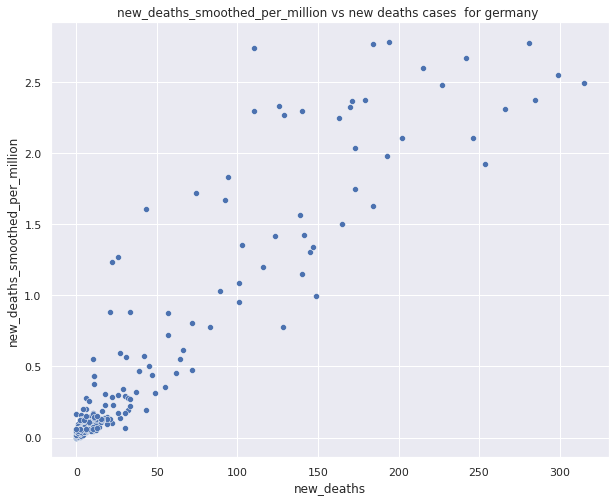

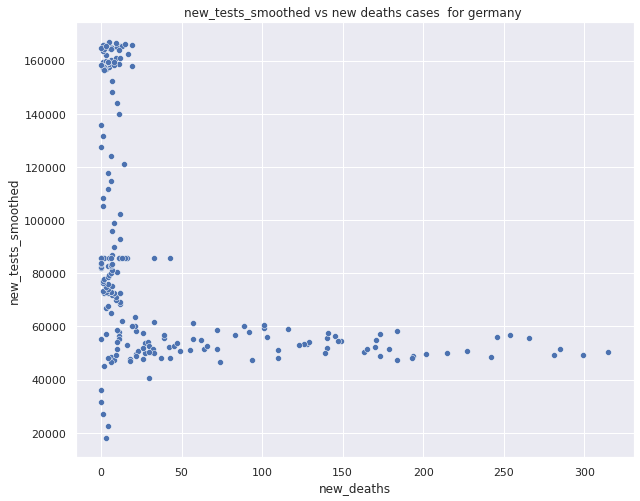

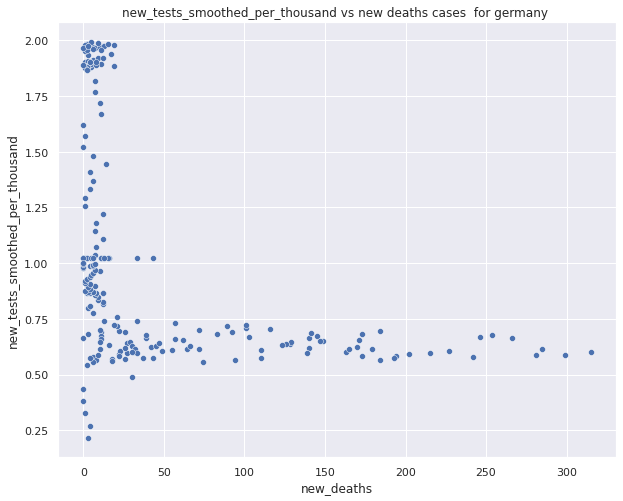

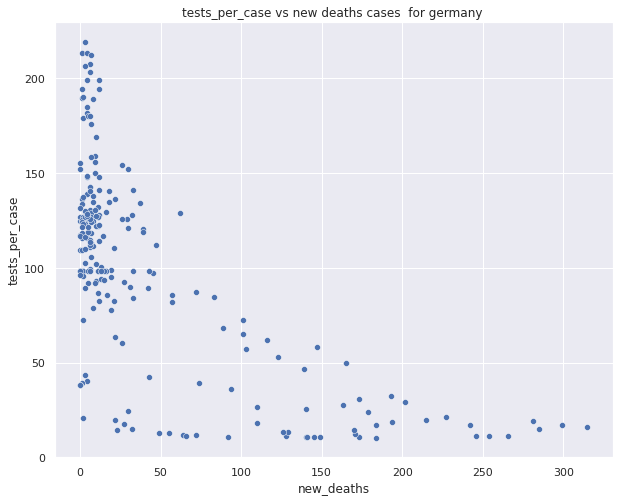

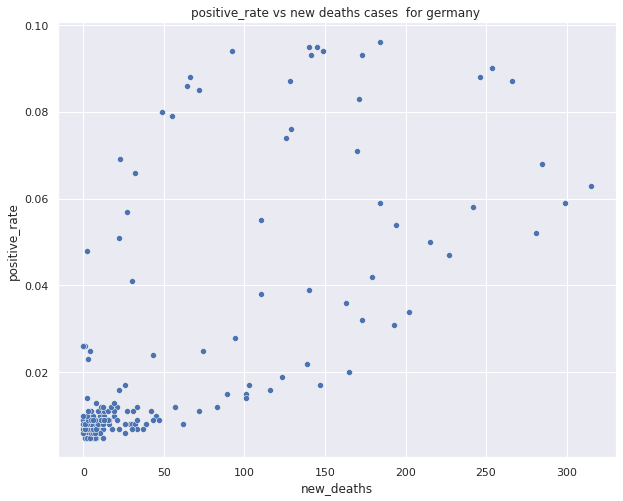

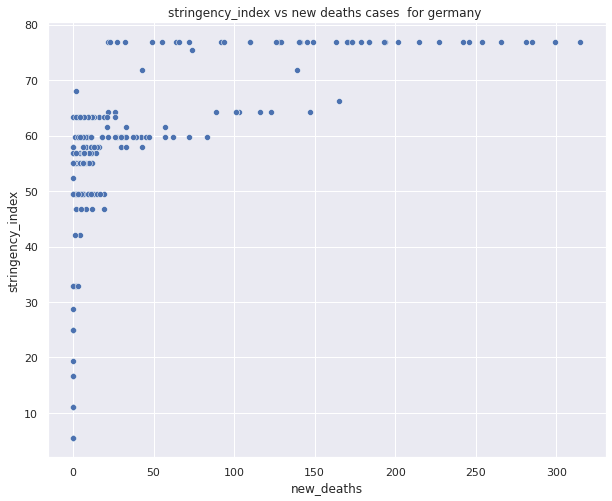

In [ ]:
for i, feature in enumerate(df_germany_new.columns[1:]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany_new.new_deaths,y=feature,data=df_germany_new).set_title(feature +" vs new deaths cases  for germany ")

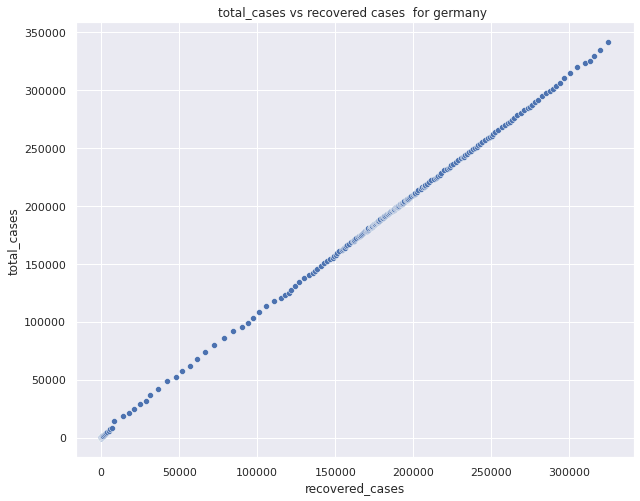

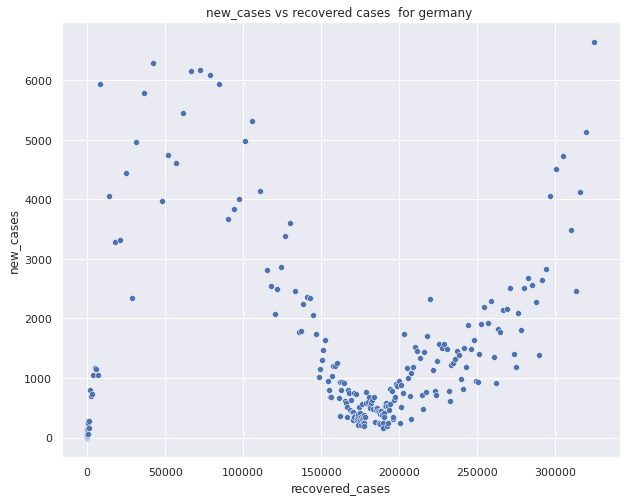

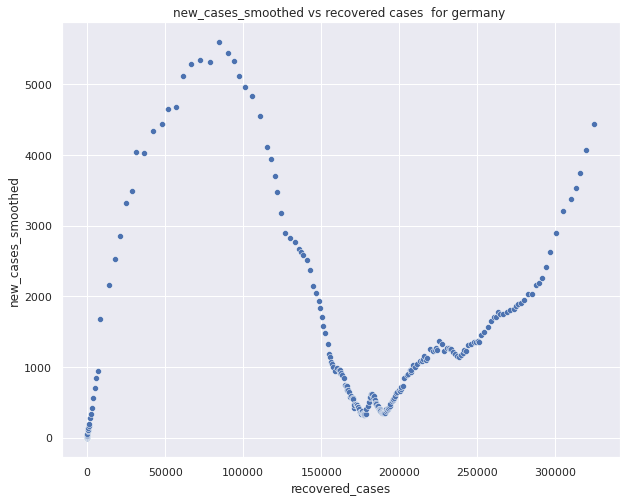

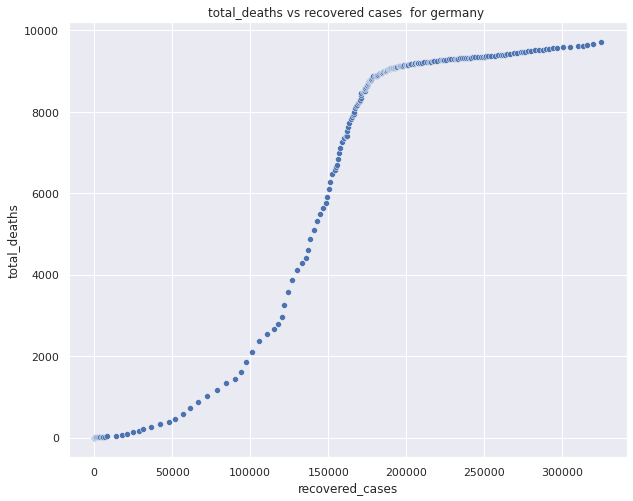

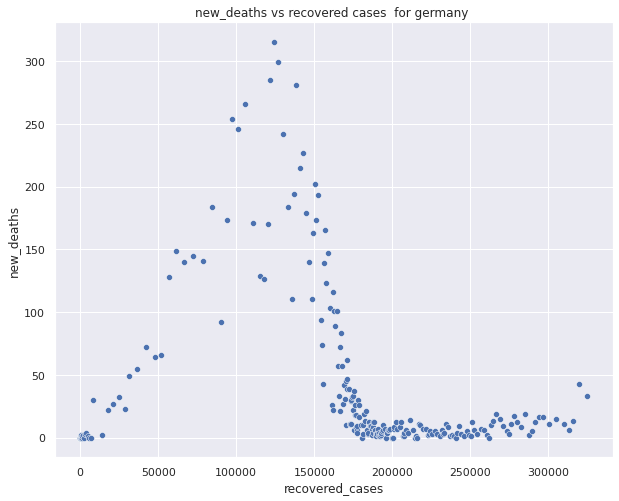

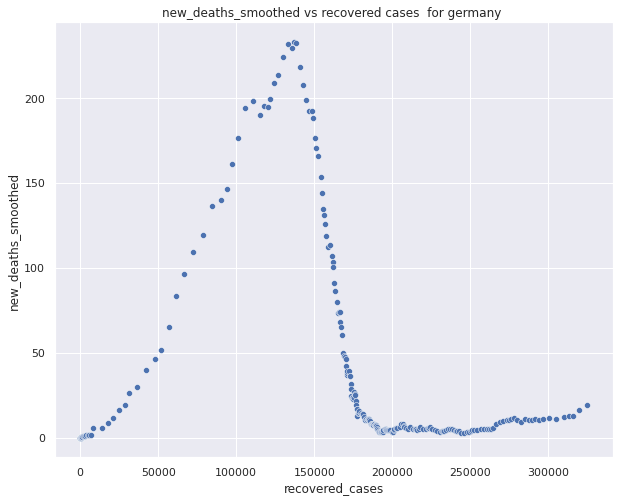

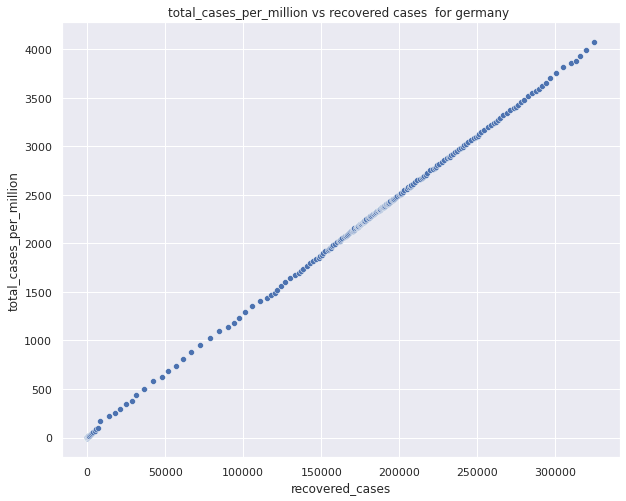

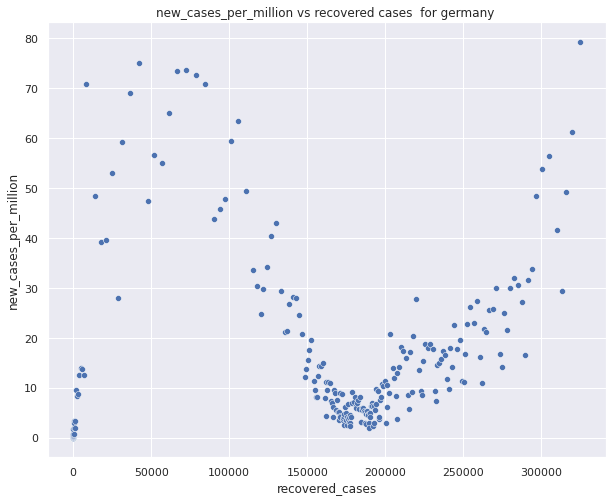

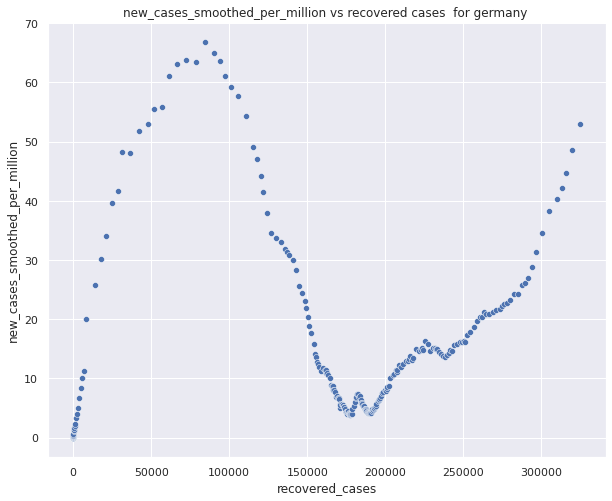

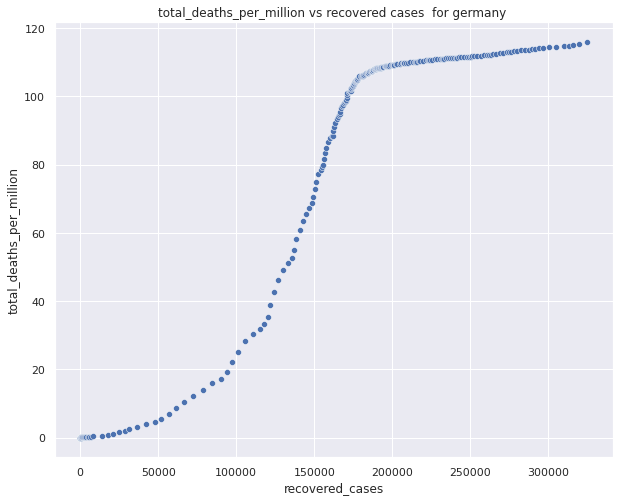

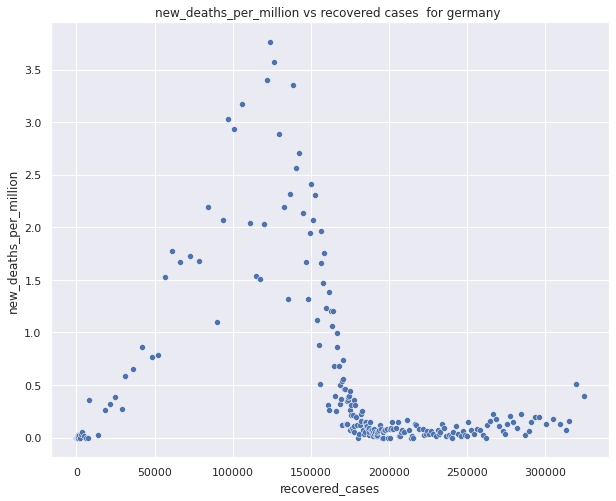

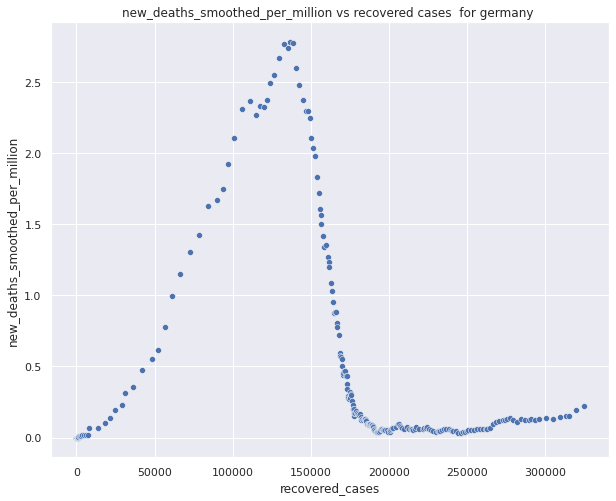

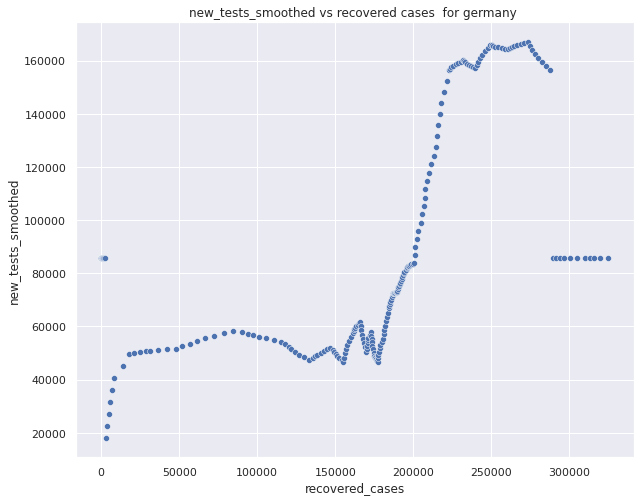

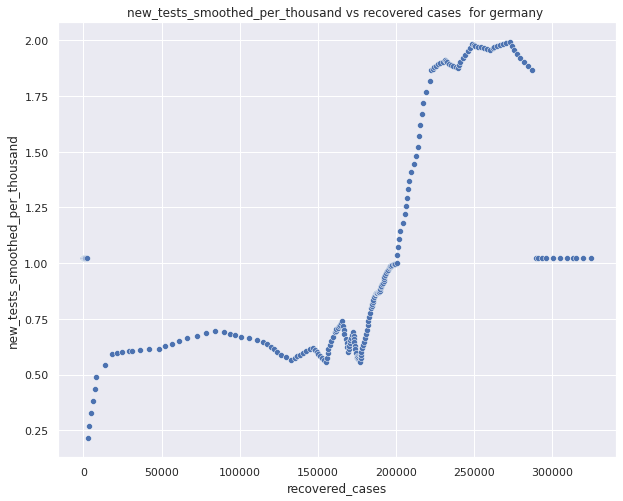

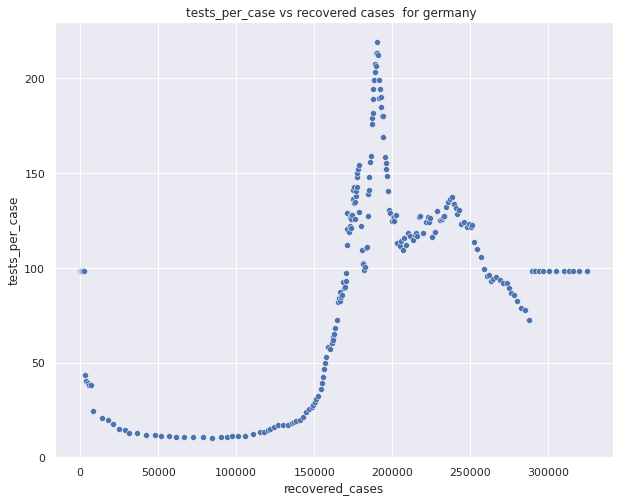

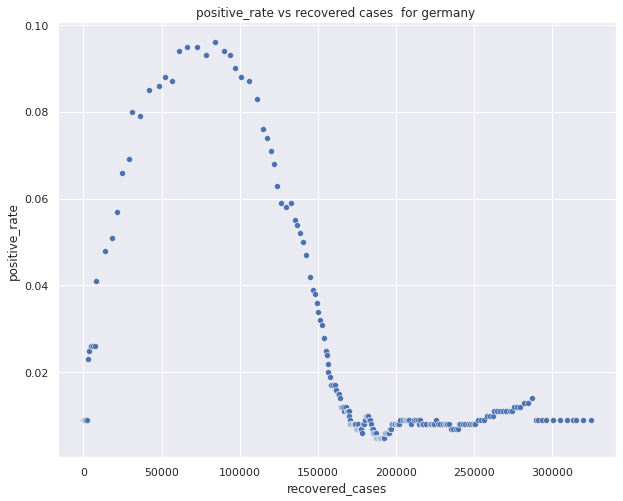

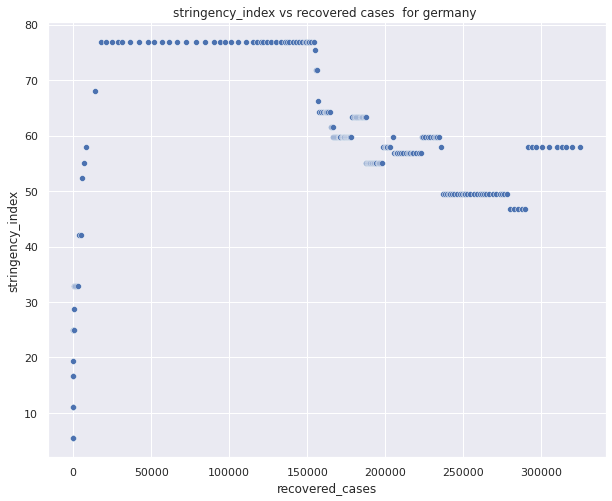

In [ ]:
for i, feature in enumerate(df_germany_new.columns[1:]):
    plt.figure(i)
    g = sns.scatterplot(x=df_germany.recovered_cases,y=feature,data=df_germany_new,ci=None).set_title(feature +" vs recovered cases  for germany ")

# The above plots are scatter plots  between new deaths and other variables 

Text(0.5, 1.0, 'scatter plot for positive rate vs tests per case ')

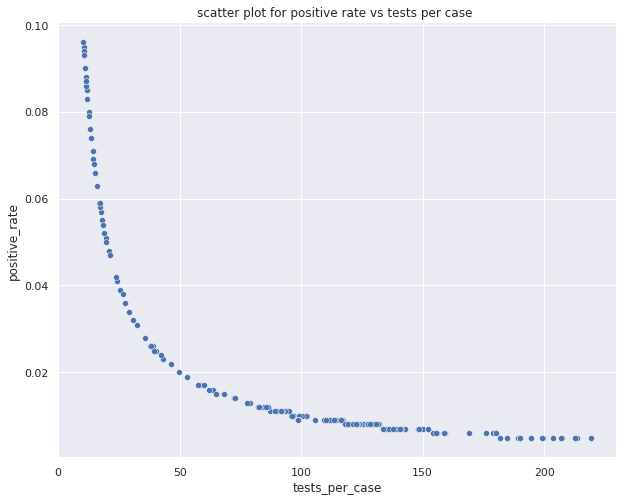

In [ ]:
sns.scatterplot(x=df_germany.tests_per_case,y=df_germany.positive_rate).set_title('scatter plot for positive rate vs tests per case ')

Text(0.5, 1.0, 'scatter plot for new cases smoothend vs positive rate')

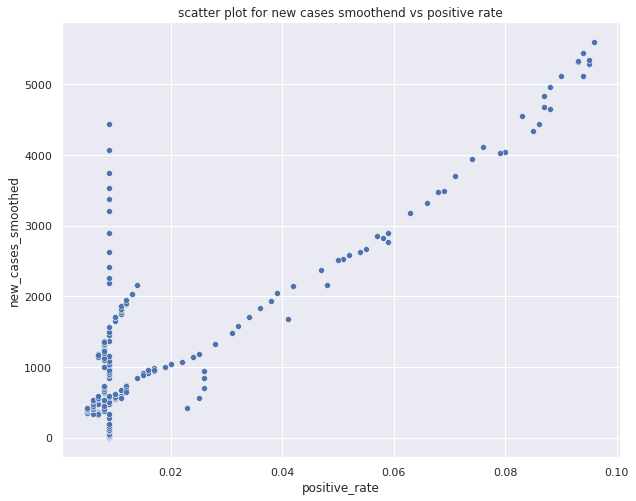

In [ ]:
sns.scatterplot(x=df_germany.positive_rate,y=df_germany.new_cases_smoothed).set_title("scatter plot for new cases smoothend vs positive rate")

Text(0.5, 1.0, 'scatter plot for new_cases_smoothed and test per case')

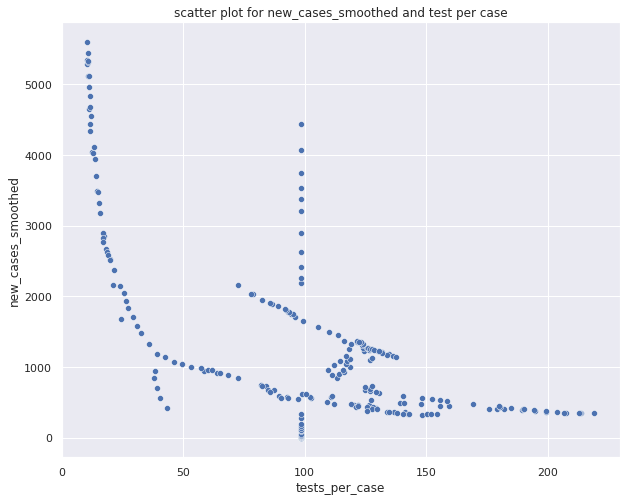

In [ ]:
sns.scatterplot(x=df_germany.tests_per_case,y=df_germany.new_cases_smoothed).set_title('scatter plot for new_cases_smoothed and test per case')

## From all of the  above scatter plots we can find the relation between the variables.


Text(0.5, 1.0, 'new_deaths vs date woth hue as positve rate')

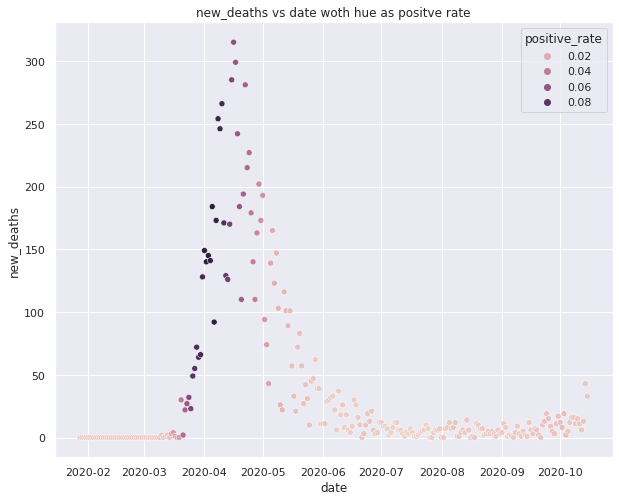

In [ ]:
sns.scatterplot(y=df_germany.new_deaths,x=df_germany.date,hue=df_germany.positive_rate).set_title("new_deaths vs date woth hue as positve rate")

Text(0.5, 1.0, 'new cases vs date woth hue as stringency_index')

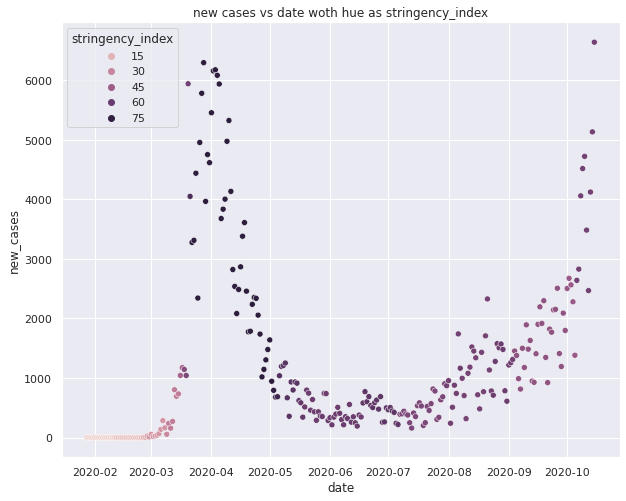

In [ ]:

sns.scatterplot(y=df_germany.new_cases,x=df_germany.date,hue=df_germany.stringency_index).set_title("new cases vs date woth hue as stringency_index")

Text(0.5, 1.0, 'new_deaths vs date woth hue as stringency_index')

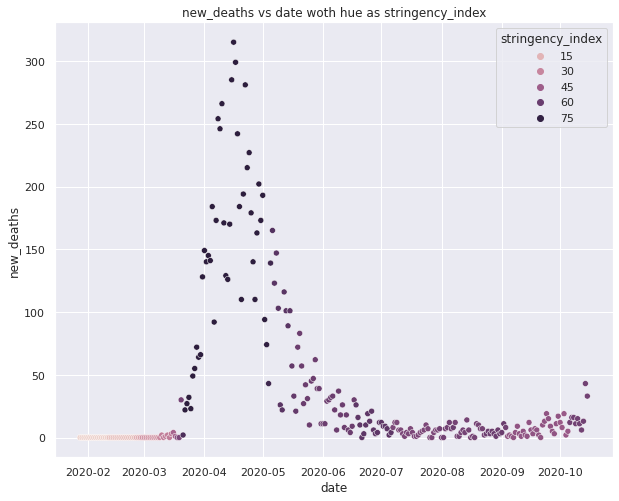

In [ ]:
sns.scatterplot(y=df_germany.new_deaths,x=df_germany.date,hue=df_germany.stringency_index).set_title("new_deaths vs date woth hue as stringency_index")

Text(0.5, 1.0, 'variation of deaths,new,cases, total cases and recovered cases with respect each day')

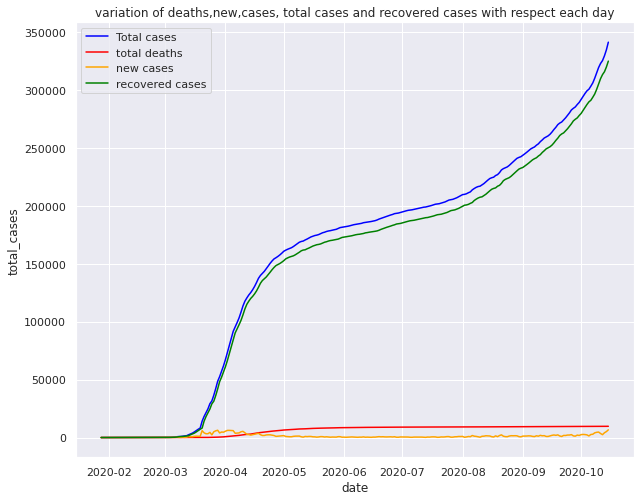

In [ ]:
sns.lineplot(x=df_germany.date,y= df_germany.total_cases, color="blue", label="Total cases", linestyle="-")
sns.lineplot(x=df_germany.date, y= df_germany.total_deaths ,color="red", label="total deaths", linestyle="-")
sns.lineplot(x=df_germany.date, y= df_germany.new_cases ,color="orange", label="new cases", linestyle="-")
sns.lineplot(x=df_germany.date ,y= df_germany.recovered_cases, color="green", label="recovered cases", linestyle="-").set_title("variation of deaths,new,cases, total cases and recovered cases with respect each day")